In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

batch_size = 128
latent_size = 64
image_size = 784 # 28*28
hidden_size = 256


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print(device)

cuda:0


In [ ]:
## Import Fashion MNIST dataset
image_transforms = transforms.Compose([ transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=image_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
print("Number of training batches:", len(trainloader), "of batch_size:", batch_size)

Number of training batches: 468 of batch_size: 128


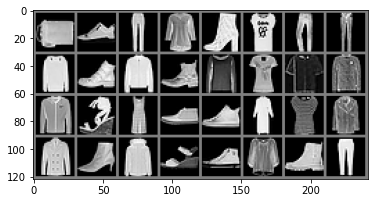

In [153]:
#display a grid of images from trainset#
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images[:32]))

In [154]:
#Generative model G
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, image_size)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.tanh(self.fc3(x))
        return x
    
# Discriminative model D
class Discriminator(nn.Module):
    #1 for real, 0 for generated
    """Output represents probability of image being real(as opposed to fake)."""
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(image_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

generator = Generator().to(device)
discriminator = Discriminator().to(device)

images = next(iter(trainloader))[0].view(batch_size, -1).to(device)
print(images.shape, discriminator(images).shape)

noise = torch.randn(batch_size, latent_size).to(device)
print(noise.shape, generator(noise).shape)

print(sum(p.numel() for p in generator.parameters() if p.requires_grad), sum(p.numel() for p in discriminator.parameters() if p.requires_grad)  )
print(discriminator(generator(noise)).shape)

torch.Size([128, 784]) torch.Size([128, 1])
torch.Size([128, 64]) torch.Size([128, 784])
283920 267009
torch.Size([128, 1])


In [155]:
# delete folder generated with everyhing in it
import shutil
shutil.rmtree('generated')
!mkdir generated

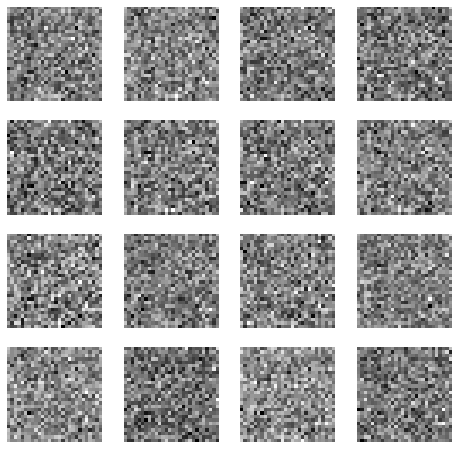

In [156]:
#display generated images
def display_generated_images(generator, image_num=-1):
    noise = torch.randn(32, latent_size, device=device)
    with torch.no_grad():
        generated_images = generator(noise).detach().cpu()

    #denormalize generated images
    generated_images = generated_images * 0.5 + 0.5
    generated_images = generated_images.view(32, 1, 28, 28).clamp(0, 1)
    # display generated images using matplotlib
    fig = plt.figure(figsize=(8, 8))
    for i in range(16):
        ax = fig.add_subplot(4, 4, i+1)
        ax.imshow(generated_images[i].squeeze(), cmap='gray')
        ax.axis('off')
    if image_num !=-1: plt.savefig(f'generated/{image_num}.png')
    if image_num % 5 == 0: plt.show()
    
display_generated_images(generator)

Epoch 0 Batch 0 Generator loss 0.6598 Discriminator loss 1.4012


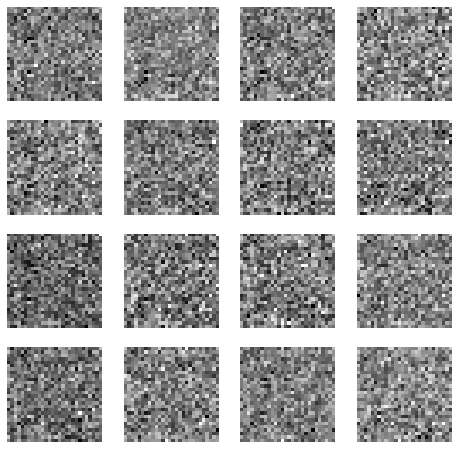

Epoch 0 Batch 400 Generator loss 4.5777 Discriminator loss 0.0297


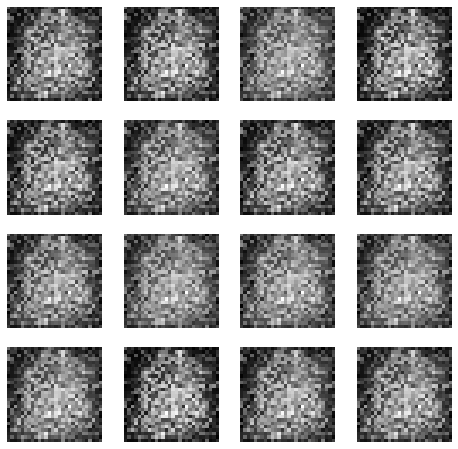

Epoch 1 Batch 0 Generator loss 5.0063 Discriminator loss 0.0350


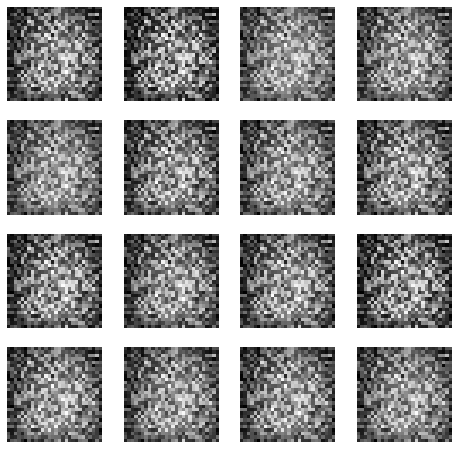

Epoch 1 Batch 400 Generator loss 4.0842 Discriminator loss 0.0476


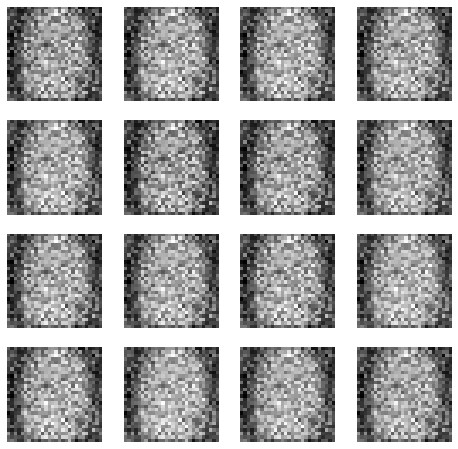

Epoch 2 Batch 0 Generator loss 4.3920 Discriminator loss 0.0377


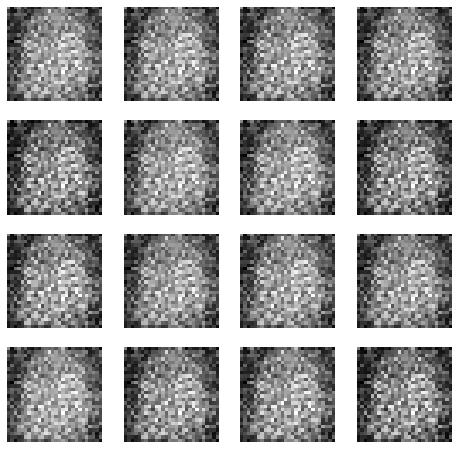

Epoch 2 Batch 400 Generator loss 5.4258 Discriminator loss 0.0193


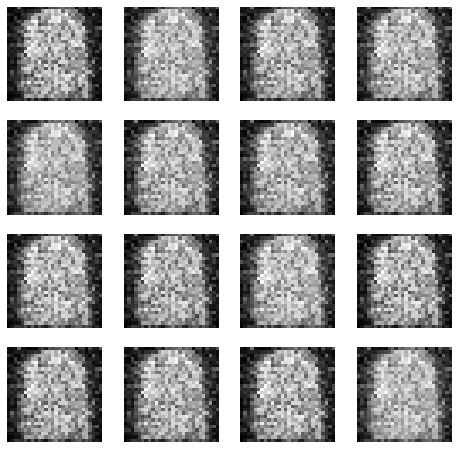

Epoch 3 Batch 0 Generator loss 8.3720 Discriminator loss 0.0401


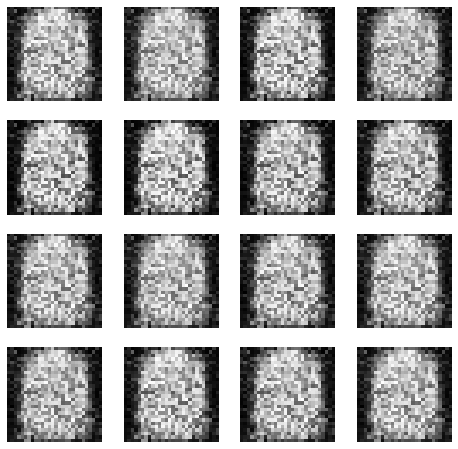

Epoch 3 Batch 400 Generator loss 4.8468 Discriminator loss 0.1331


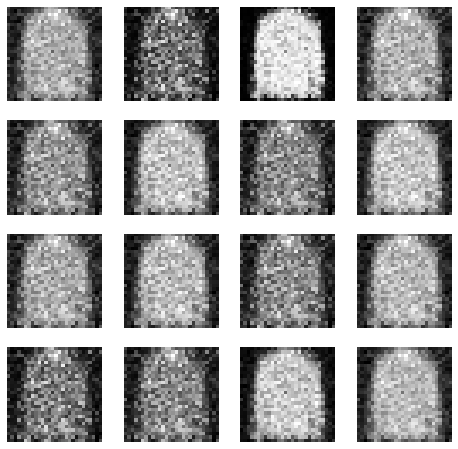

Epoch 4 Batch 0 Generator loss 5.4229 Discriminator loss 0.0445


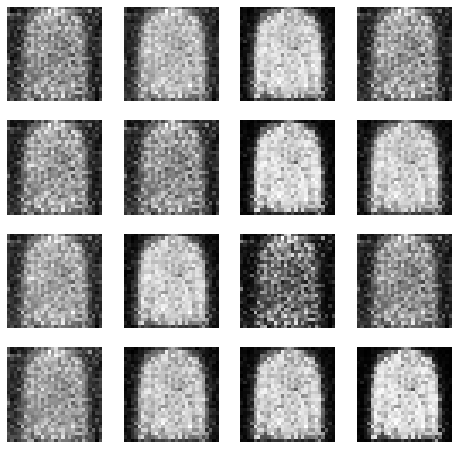

Epoch 4 Batch 400 Generator loss 5.7982 Discriminator loss 0.0474


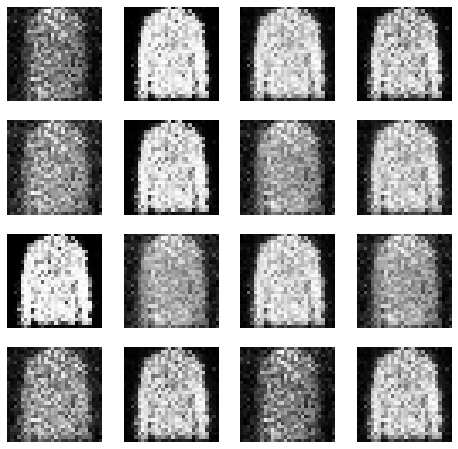

Epoch 5 Batch 0 Generator loss 5.8372 Discriminator loss 0.0369


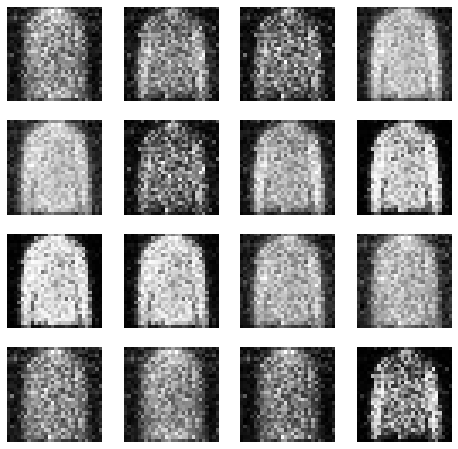

Epoch 5 Batch 400 Generator loss 5.4729 Discriminator loss 0.0379


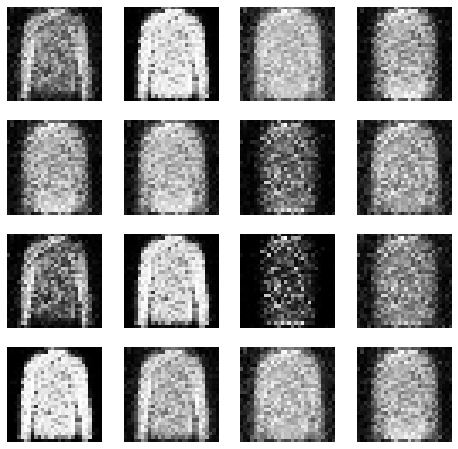

Epoch 6 Batch 0 Generator loss 6.4427 Discriminator loss 0.0268


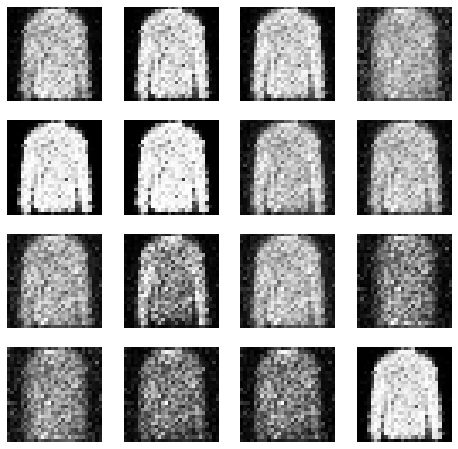

Epoch 6 Batch 400 Generator loss 5.6613 Discriminator loss 0.0945


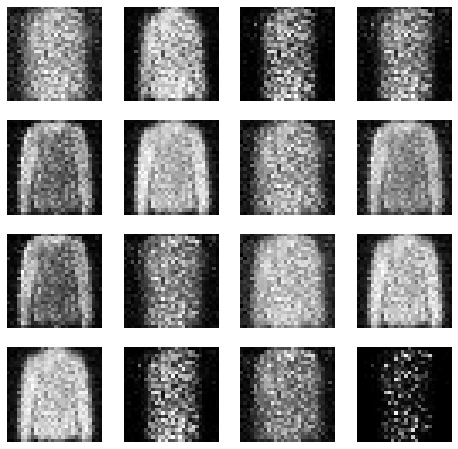

Epoch 7 Batch 0 Generator loss 4.8005 Discriminator loss 0.0702


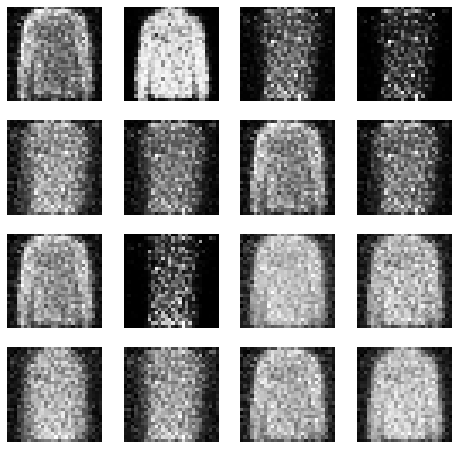

Epoch 7 Batch 400 Generator loss 3.8339 Discriminator loss 0.1285


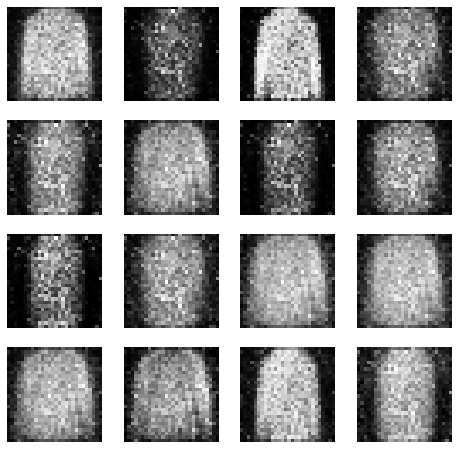

Epoch 8 Batch 0 Generator loss 4.8536 Discriminator loss 0.0497


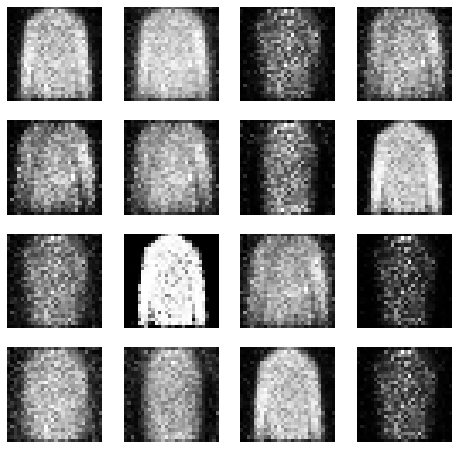

Epoch 8 Batch 400 Generator loss 6.2704 Discriminator loss 0.0368


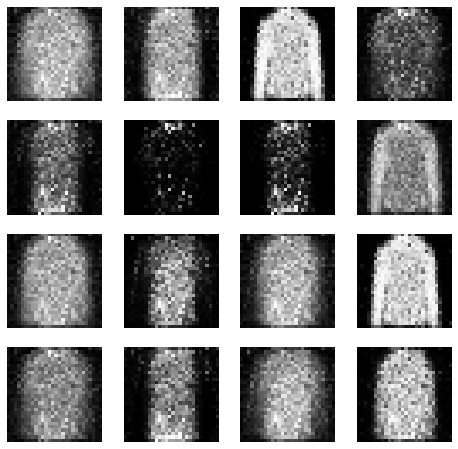

Epoch 9 Batch 0 Generator loss 7.0620 Discriminator loss 0.1895


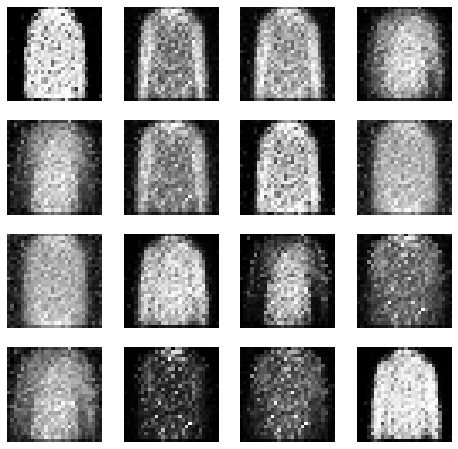

Epoch 9 Batch 400 Generator loss 4.3495 Discriminator loss 0.1230


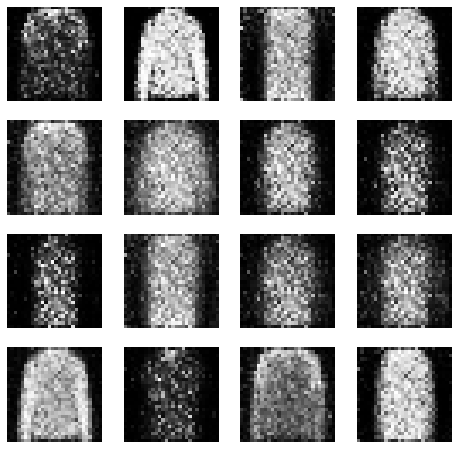

Epoch 10 Batch 0 Generator loss 5.7183 Discriminator loss 0.4909


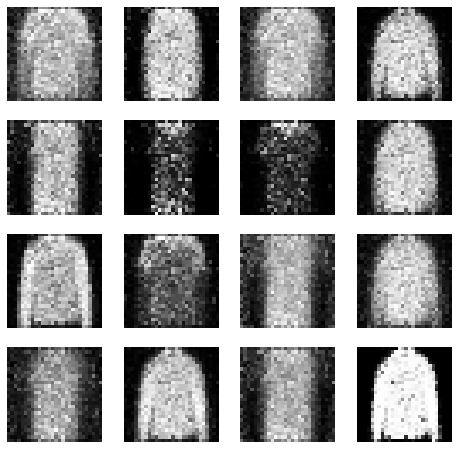

Epoch 10 Batch 400 Generator loss 4.4439 Discriminator loss 0.2707


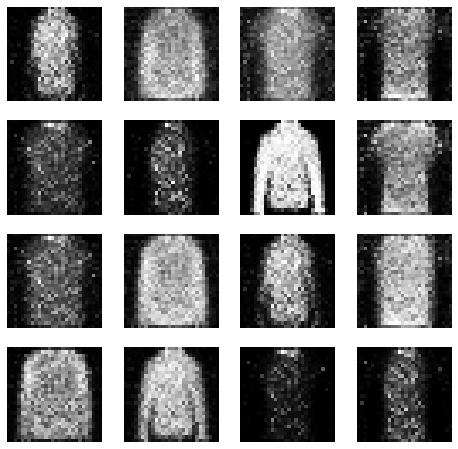

Epoch 11 Batch 0 Generator loss 4.5588 Discriminator loss 0.1373


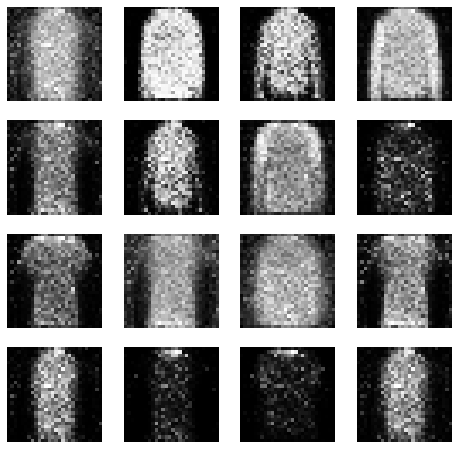

Epoch 11 Batch 400 Generator loss 4.5647 Discriminator loss 0.2157


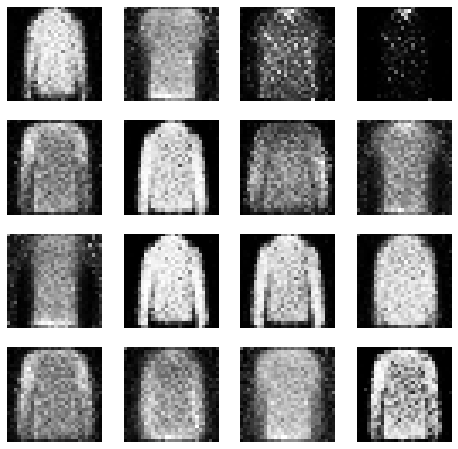

Epoch 12 Batch 0 Generator loss 5.4883 Discriminator loss 0.1297


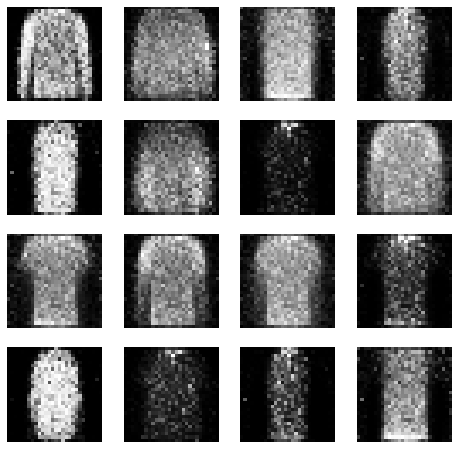

Epoch 12 Batch 400 Generator loss 4.2014 Discriminator loss 0.1375


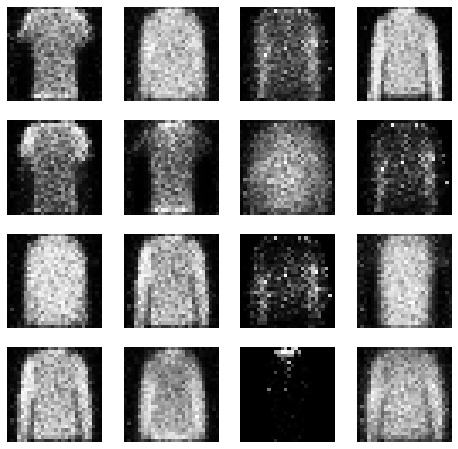

Epoch 13 Batch 0 Generator loss 4.1003 Discriminator loss 0.3212


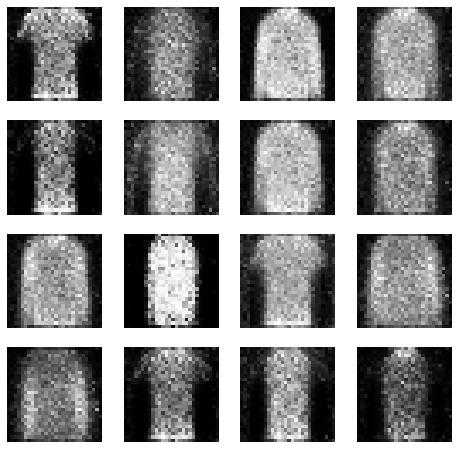

Epoch 13 Batch 400 Generator loss 3.8511 Discriminator loss 0.3219


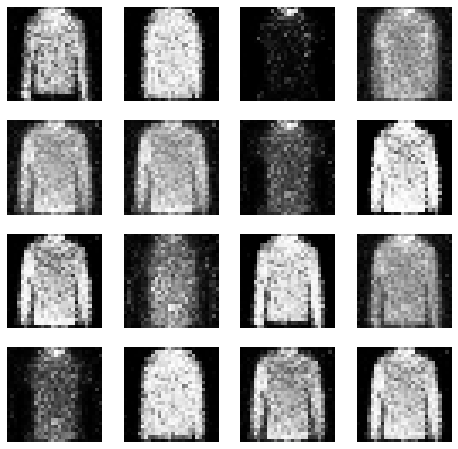

Epoch 14 Batch 0 Generator loss 4.2474 Discriminator loss 0.2289


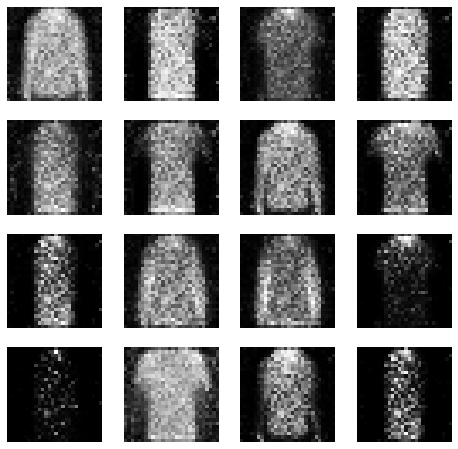

Epoch 14 Batch 400 Generator loss 3.7781 Discriminator loss 0.2608


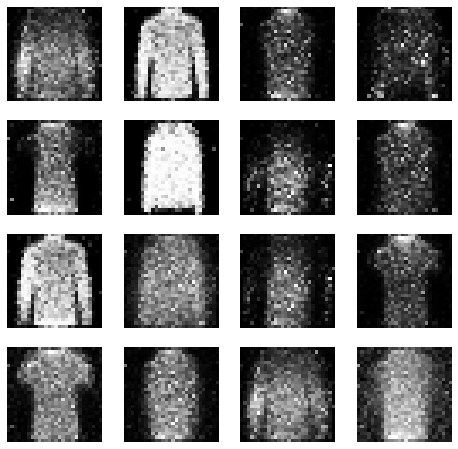

Epoch 15 Batch 0 Generator loss 4.5357 Discriminator loss 0.2930


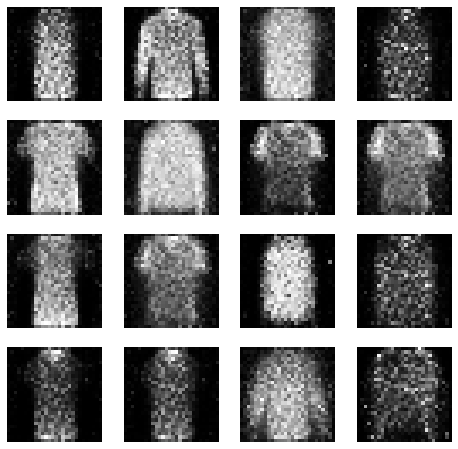

Epoch 15 Batch 400 Generator loss 3.2597 Discriminator loss 0.2918


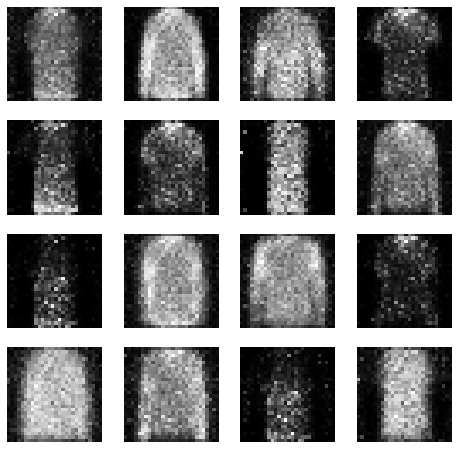

Epoch 16 Batch 0 Generator loss 4.3806 Discriminator loss 0.2522


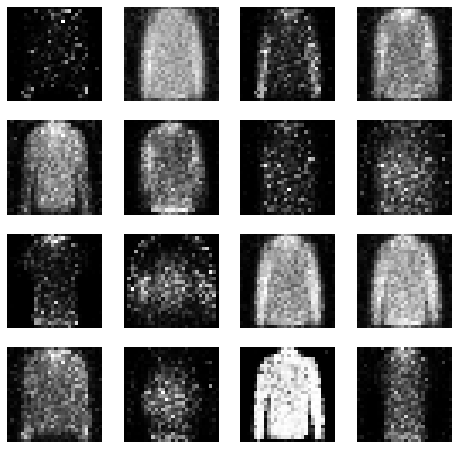

Epoch 16 Batch 400 Generator loss 3.4887 Discriminator loss 0.1817


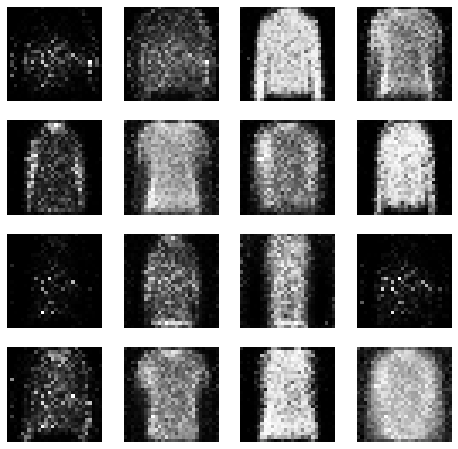

Epoch 17 Batch 0 Generator loss 3.2239 Discriminator loss 0.2858


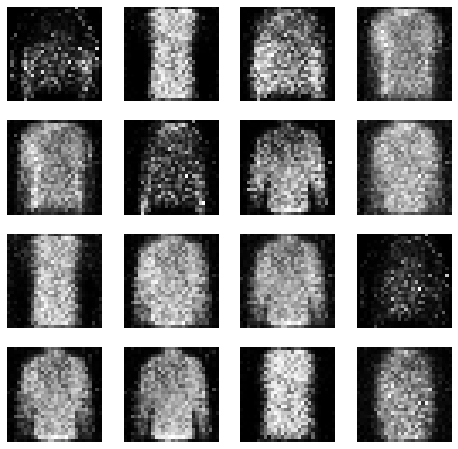

Epoch 17 Batch 400 Generator loss 3.7627 Discriminator loss 0.3204


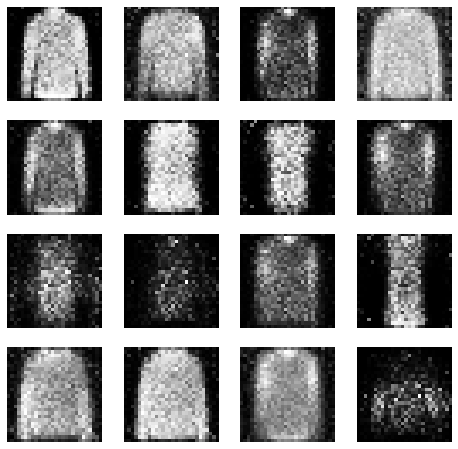

Epoch 18 Batch 0 Generator loss 2.9584 Discriminator loss 0.2959


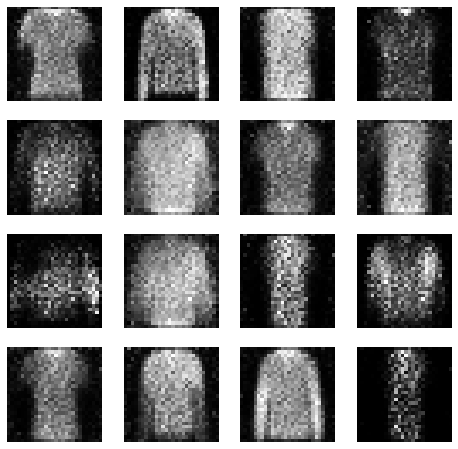

Epoch 18 Batch 400 Generator loss 3.5641 Discriminator loss 0.5641


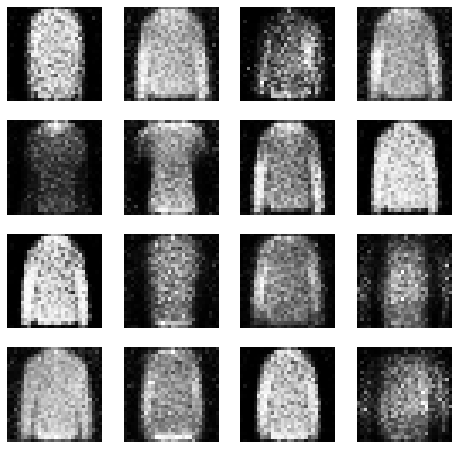

Epoch 19 Batch 0 Generator loss 4.2328 Discriminator loss 0.3380


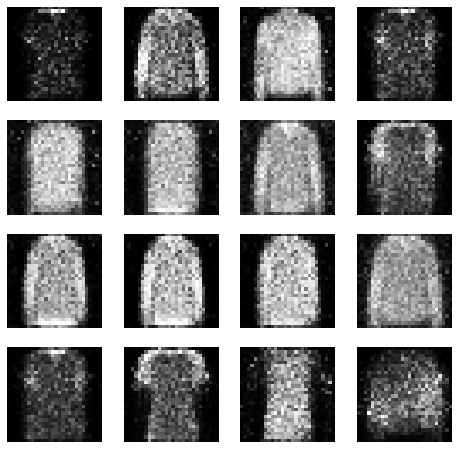

Epoch 19 Batch 400 Generator loss 3.6128 Discriminator loss 0.2759


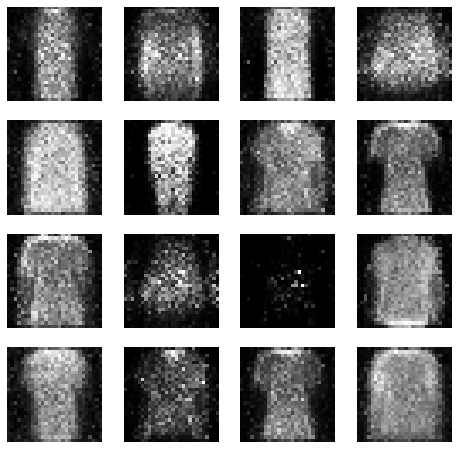

Epoch 20 Batch 0 Generator loss 3.6462 Discriminator loss 0.3381


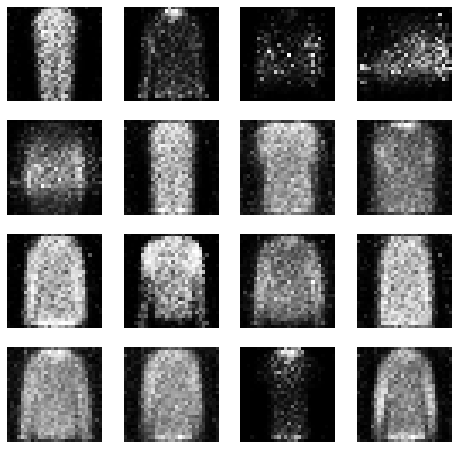

Epoch 20 Batch 400 Generator loss 3.1869 Discriminator loss 0.4637


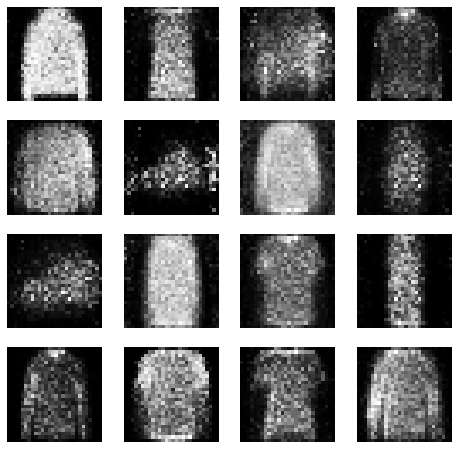

Epoch 21 Batch 0 Generator loss 4.0183 Discriminator loss 0.2355


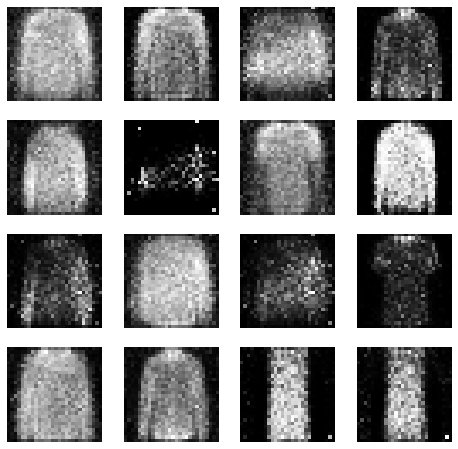

Epoch 21 Batch 400 Generator loss 3.8182 Discriminator loss 0.2453


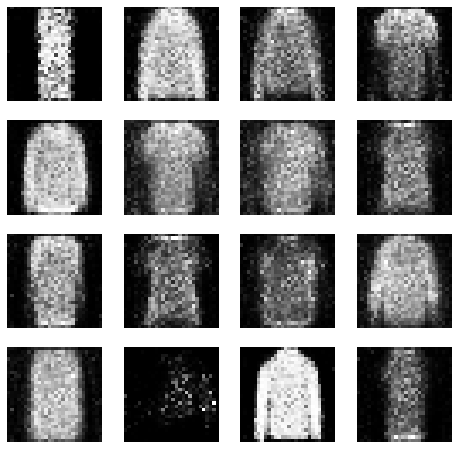

Epoch 22 Batch 0 Generator loss 4.5006 Discriminator loss 0.3464


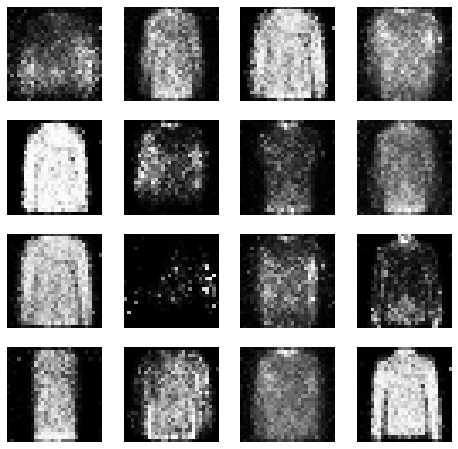

Epoch 22 Batch 400 Generator loss 3.8195 Discriminator loss 0.3430


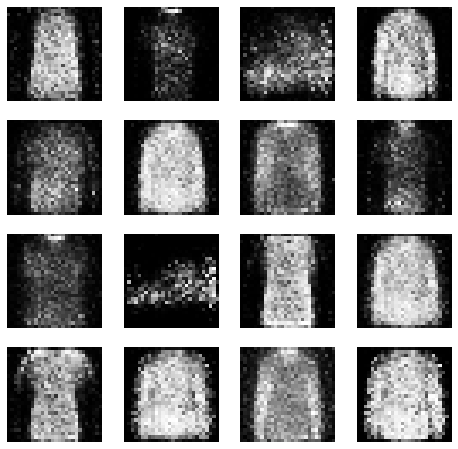

Epoch 23 Batch 0 Generator loss 2.4249 Discriminator loss 0.3908


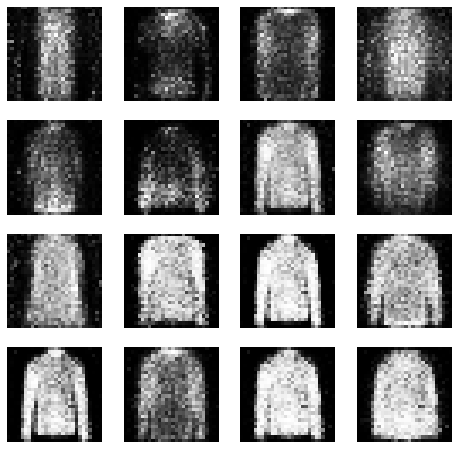

Epoch 23 Batch 400 Generator loss 3.0134 Discriminator loss 0.4187


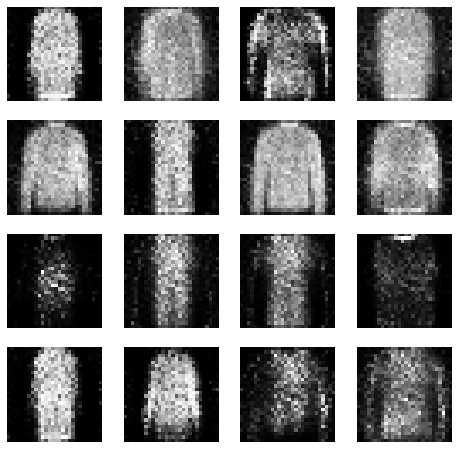

Epoch 24 Batch 0 Generator loss 3.0997 Discriminator loss 0.3862


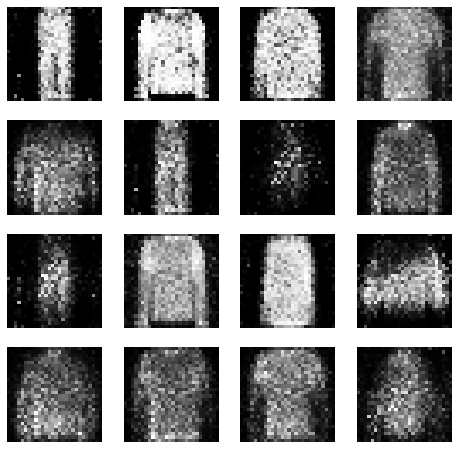

Epoch 24 Batch 400 Generator loss 3.1935 Discriminator loss 0.2437


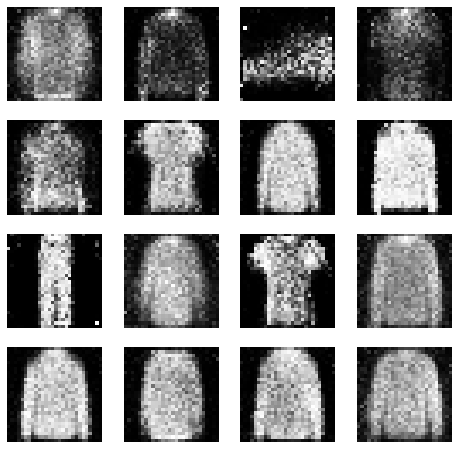

Epoch 25 Batch 0 Generator loss 3.3074 Discriminator loss 0.1448


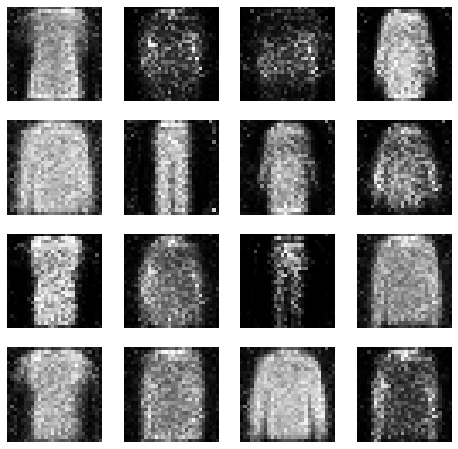

Epoch 25 Batch 400 Generator loss 3.9567 Discriminator loss 0.3245


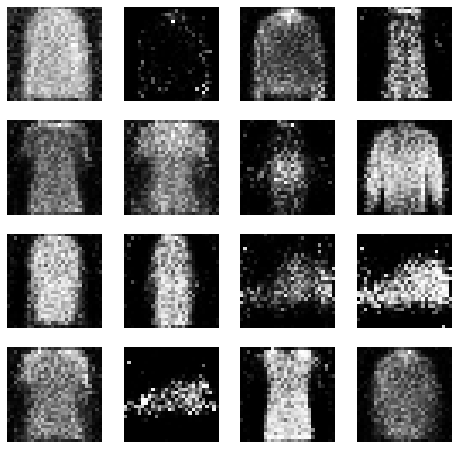

Epoch 26 Batch 0 Generator loss 3.6122 Discriminator loss 0.4629


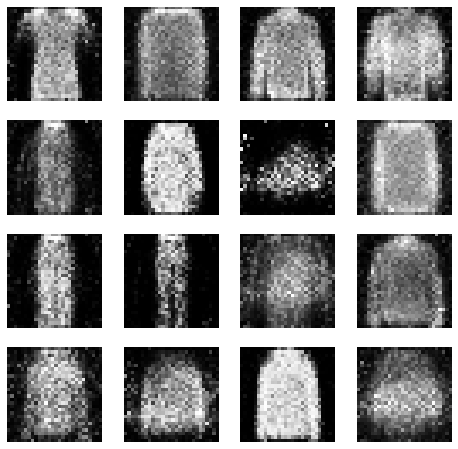

Epoch 26 Batch 400 Generator loss 3.5069 Discriminator loss 0.3343


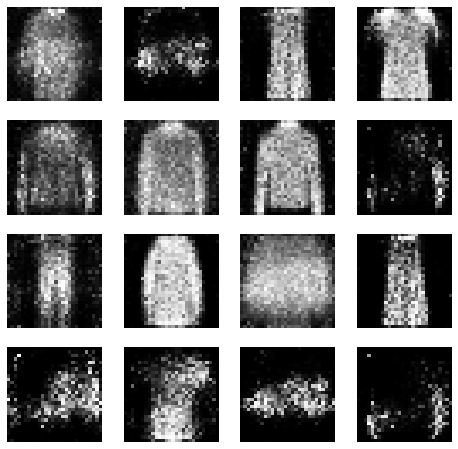

Epoch 27 Batch 0 Generator loss 4.0611 Discriminator loss 0.3770


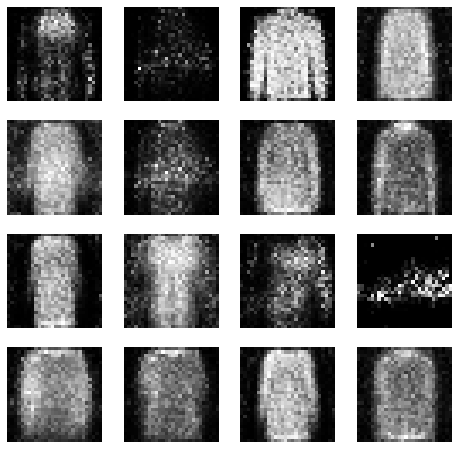

Epoch 27 Batch 400 Generator loss 3.0513 Discriminator loss 0.3822


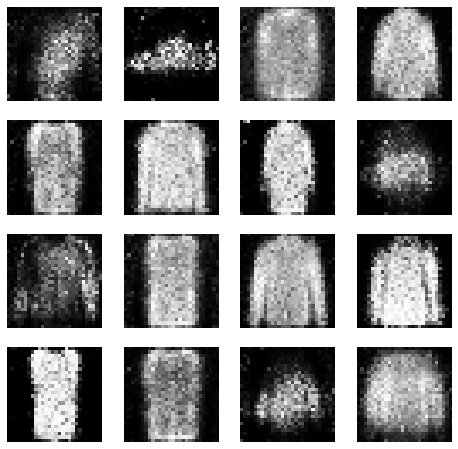

Epoch 28 Batch 0 Generator loss 3.6217 Discriminator loss 0.2690


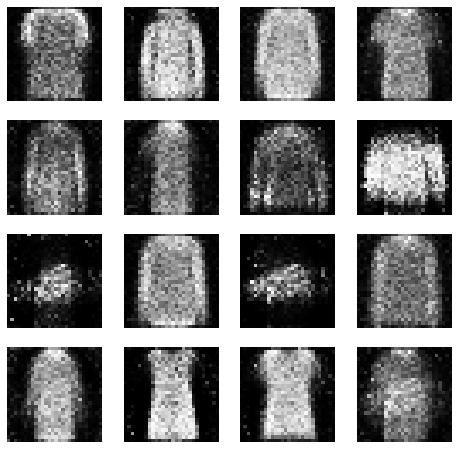

Epoch 28 Batch 400 Generator loss 3.8462 Discriminator loss 0.3094


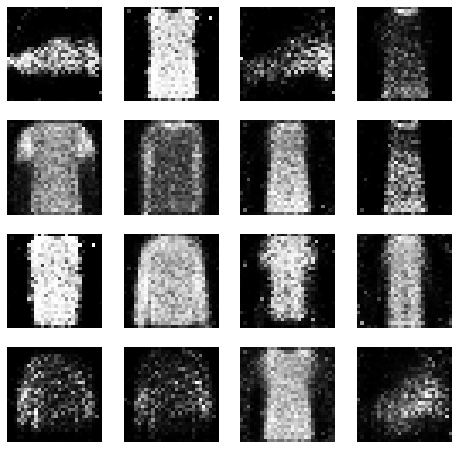

Epoch 29 Batch 0 Generator loss 3.0418 Discriminator loss 0.4132


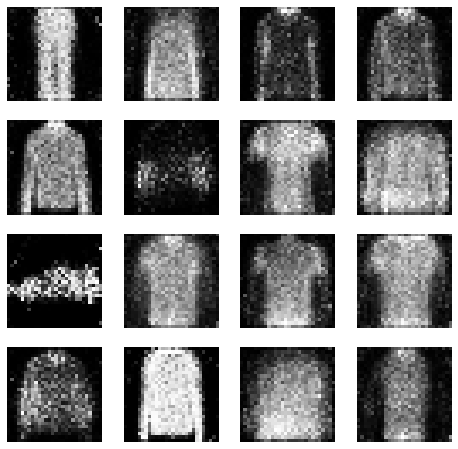

Epoch 29 Batch 400 Generator loss 4.6763 Discriminator loss 0.3645


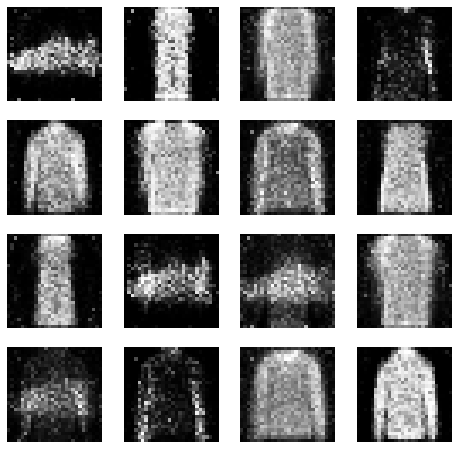

Epoch 30 Batch 0 Generator loss 3.0538 Discriminator loss 0.3344


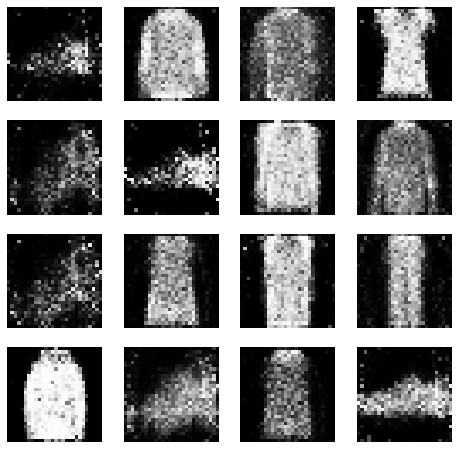

Epoch 30 Batch 400 Generator loss 4.4217 Discriminator loss 0.3856


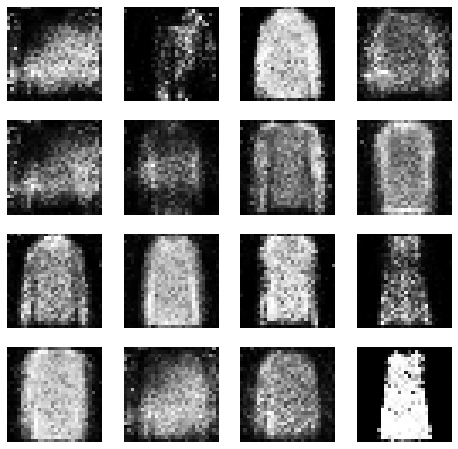

Epoch 31 Batch 0 Generator loss 3.1740 Discriminator loss 0.4165


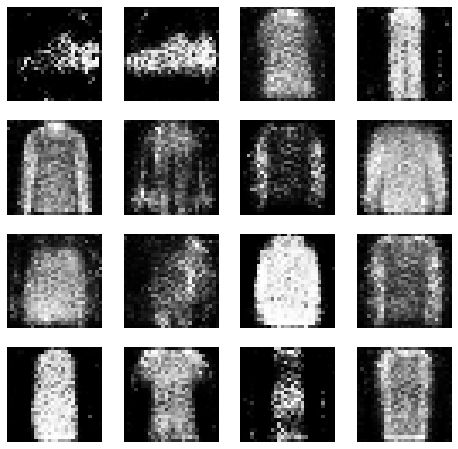

Epoch 31 Batch 400 Generator loss 3.0208 Discriminator loss 0.5104


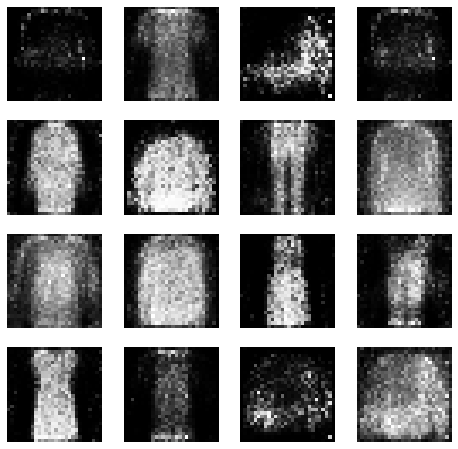

Epoch 32 Batch 0 Generator loss 2.6121 Discriminator loss 0.4669


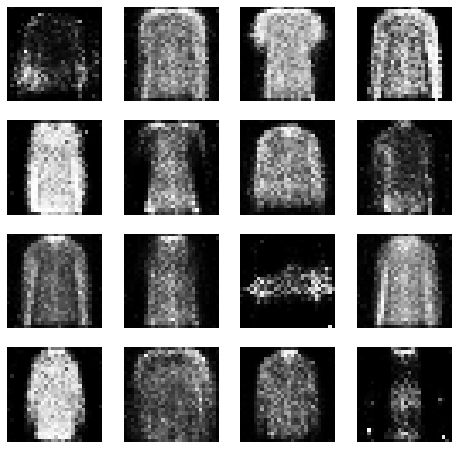

Epoch 32 Batch 400 Generator loss 2.8733 Discriminator loss 0.4853


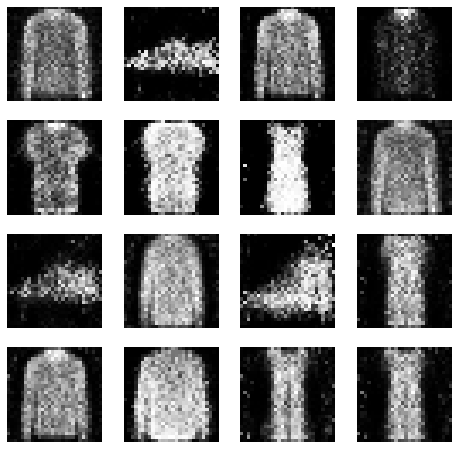

Epoch 33 Batch 0 Generator loss 2.9774 Discriminator loss 0.4584


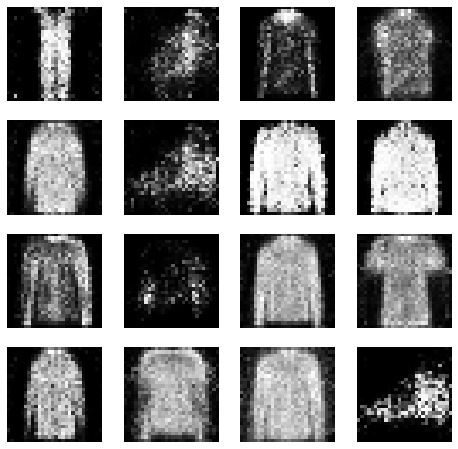

Epoch 33 Batch 400 Generator loss 3.4724 Discriminator loss 0.3710


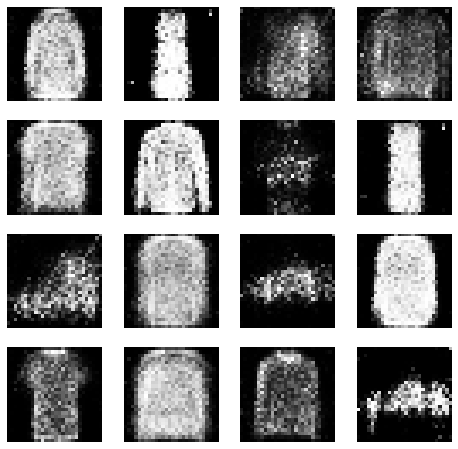

Epoch 34 Batch 0 Generator loss 2.4738 Discriminator loss 0.5893


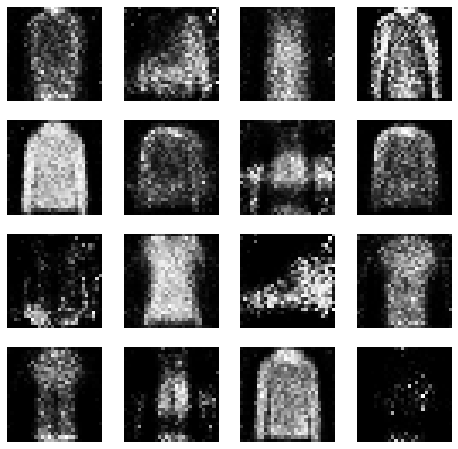

Epoch 34 Batch 400 Generator loss 3.0303 Discriminator loss 0.4747


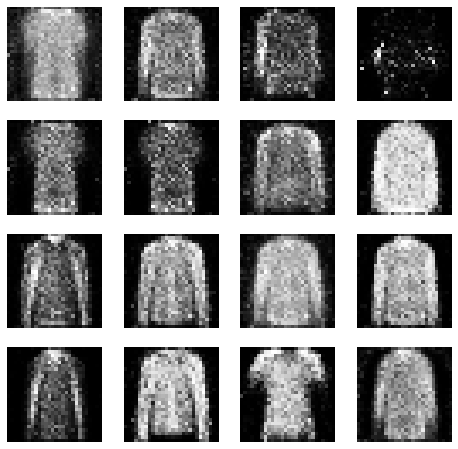

Epoch 35 Batch 0 Generator loss 3.6093 Discriminator loss 0.5360


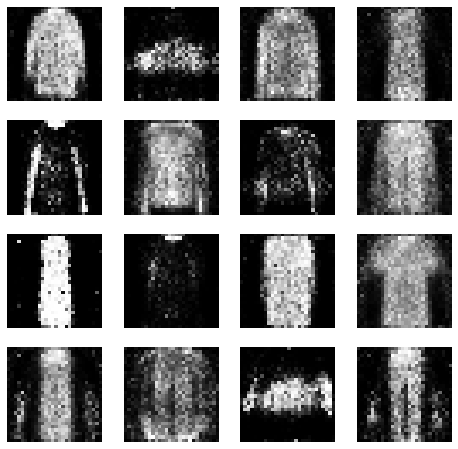

Epoch 35 Batch 400 Generator loss 2.6543 Discriminator loss 0.4481


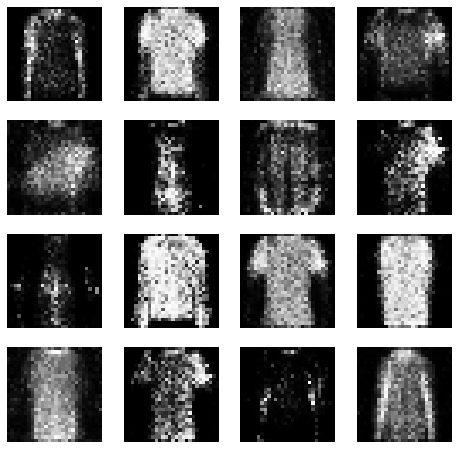

Epoch 36 Batch 0 Generator loss 2.6150 Discriminator loss 0.4659


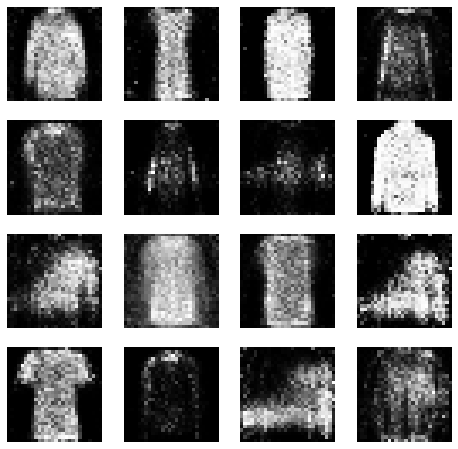

Epoch 36 Batch 400 Generator loss 3.0989 Discriminator loss 0.3666


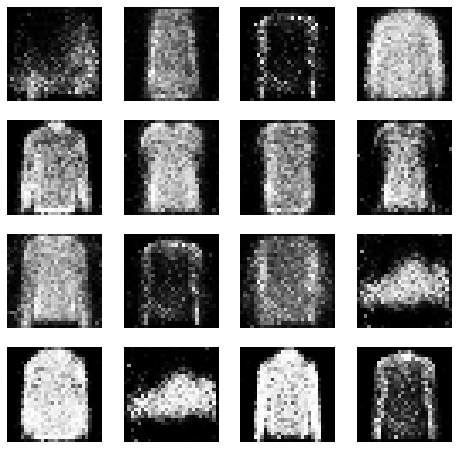

Epoch 37 Batch 0 Generator loss 2.3263 Discriminator loss 0.4640


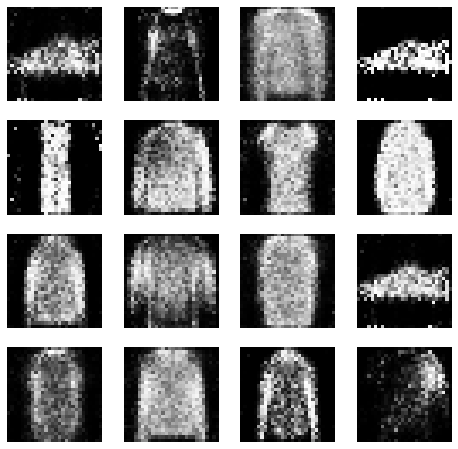

Epoch 37 Batch 400 Generator loss 2.8113 Discriminator loss 0.6540


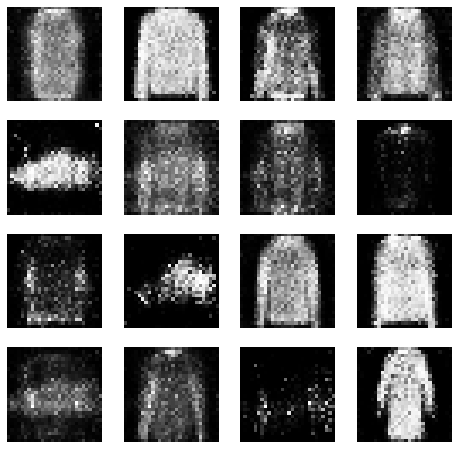

Epoch 38 Batch 0 Generator loss 3.2803 Discriminator loss 0.1924


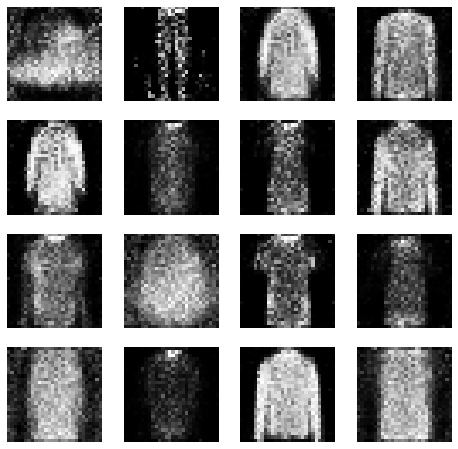

Epoch 38 Batch 400 Generator loss 3.6150 Discriminator loss 0.3639


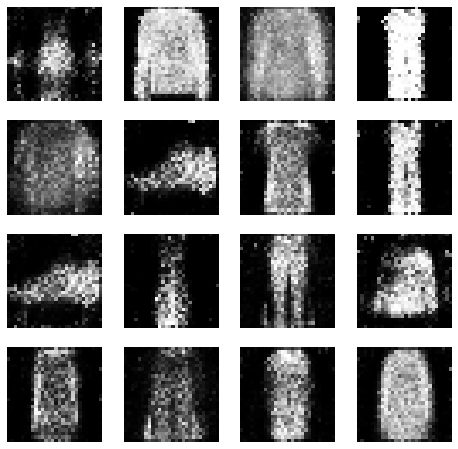

Epoch 39 Batch 0 Generator loss 2.3761 Discriminator loss 0.6441


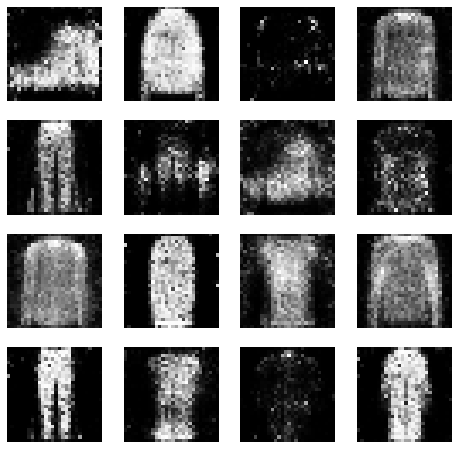

Epoch 39 Batch 400 Generator loss 3.0552 Discriminator loss 0.5652


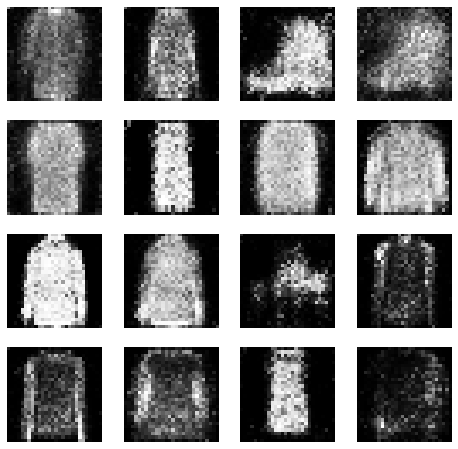

Epoch 40 Batch 0 Generator loss 3.1735 Discriminator loss 0.4491


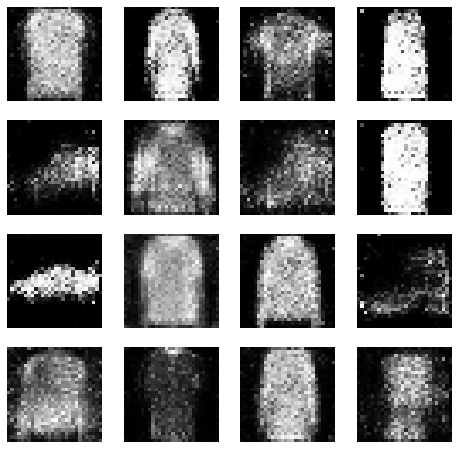

Epoch 40 Batch 400 Generator loss 2.3291 Discriminator loss 0.5510


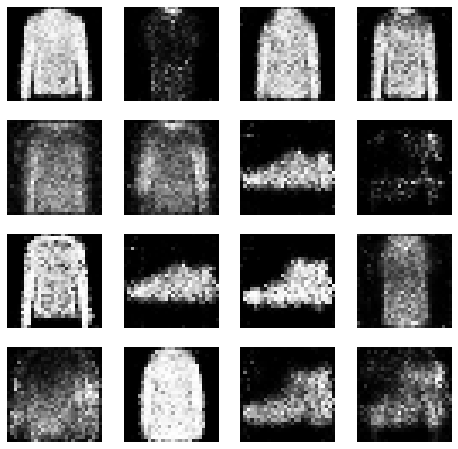

Epoch 41 Batch 0 Generator loss 2.9526 Discriminator loss 0.5753


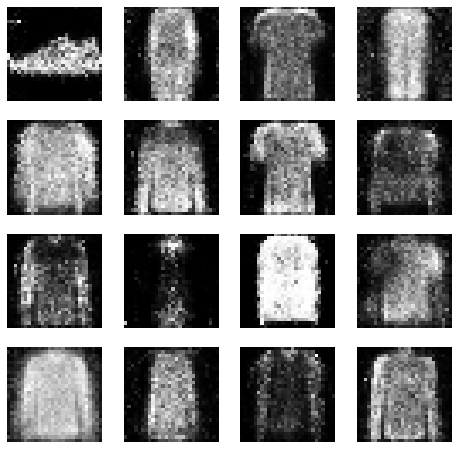

Epoch 41 Batch 400 Generator loss 3.2947 Discriminator loss 0.5944


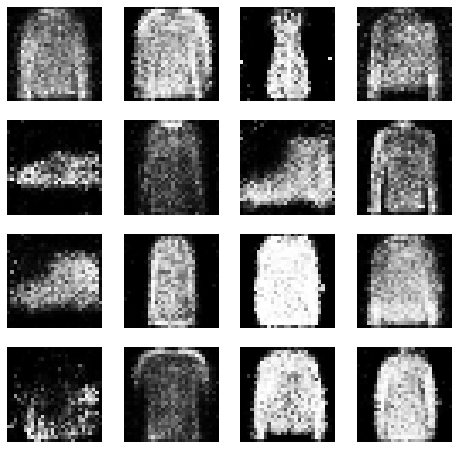

Epoch 42 Batch 0 Generator loss 3.0370 Discriminator loss 0.6172


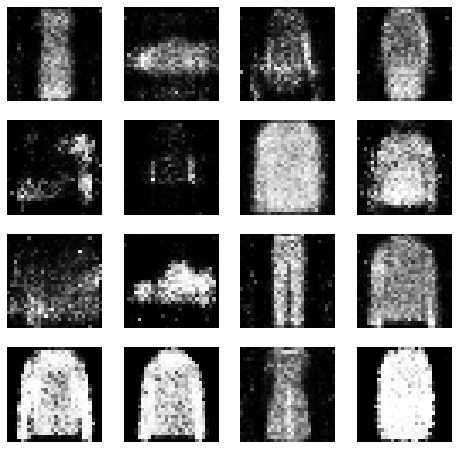

Epoch 42 Batch 400 Generator loss 2.4256 Discriminator loss 0.5635


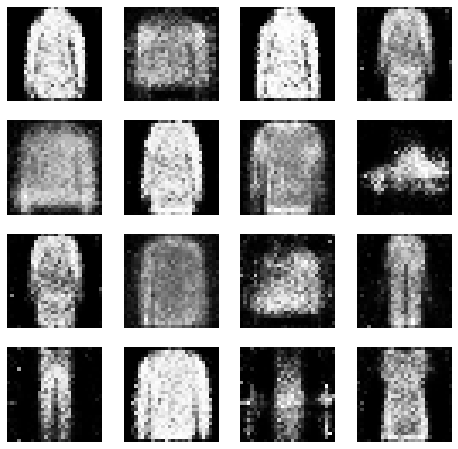

Epoch 43 Batch 0 Generator loss 3.0190 Discriminator loss 0.7804


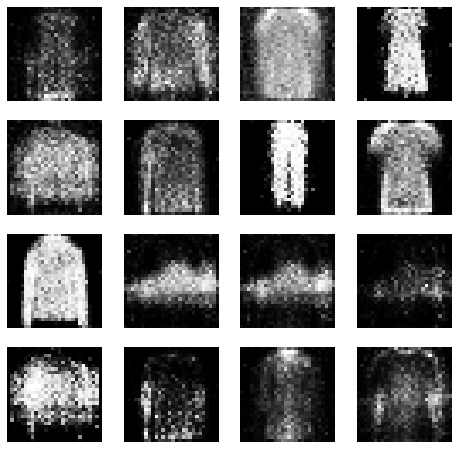

Epoch 43 Batch 400 Generator loss 2.9428 Discriminator loss 0.3728


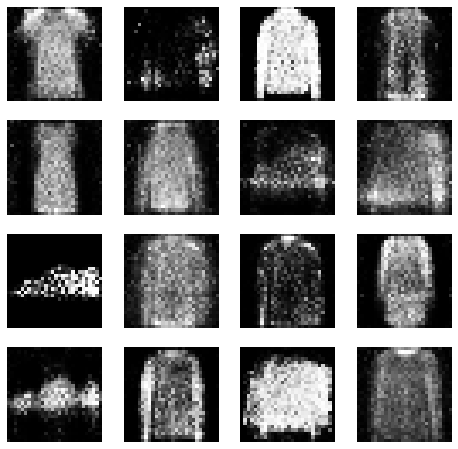

Epoch 44 Batch 0 Generator loss 2.0959 Discriminator loss 0.4527


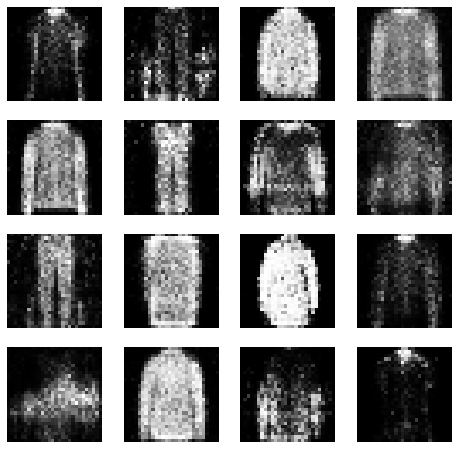

Epoch 44 Batch 400 Generator loss 2.8830 Discriminator loss 0.5378


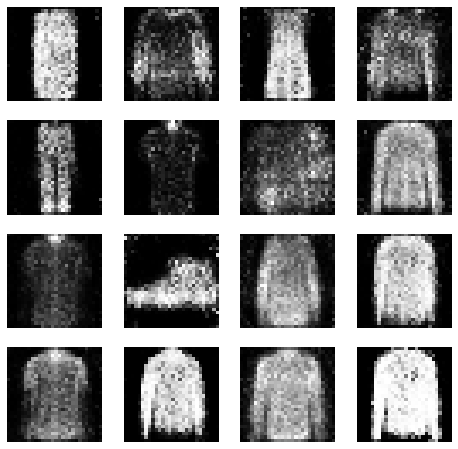

Epoch 45 Batch 0 Generator loss 2.9505 Discriminator loss 0.4511


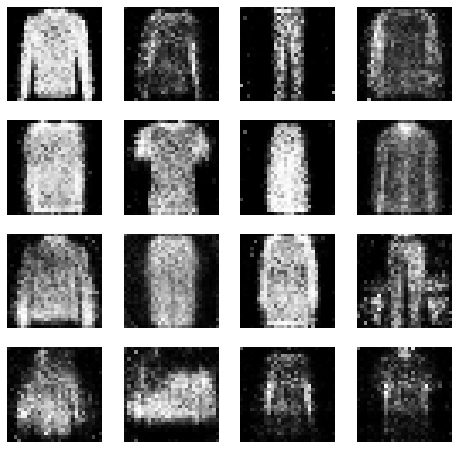

Epoch 45 Batch 400 Generator loss 2.3649 Discriminator loss 0.6689


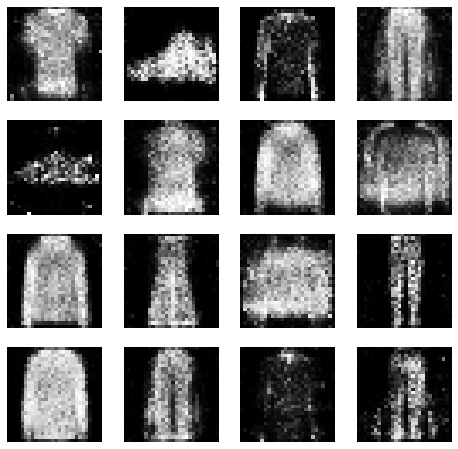

Epoch 46 Batch 0 Generator loss 3.2366 Discriminator loss 0.4791


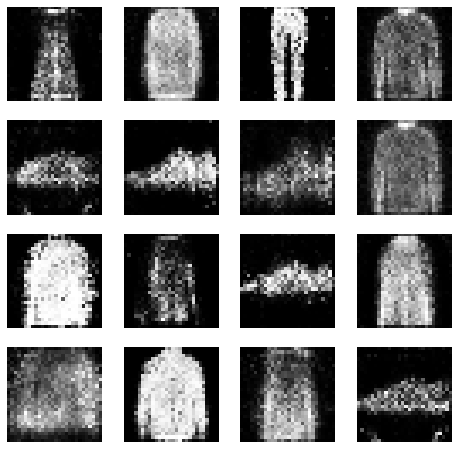

Epoch 46 Batch 400 Generator loss 2.9638 Discriminator loss 0.4556


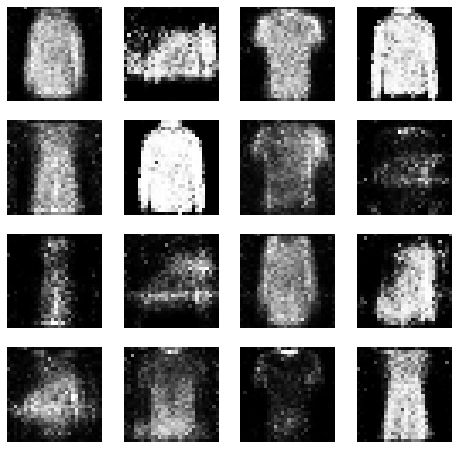

Epoch 47 Batch 0 Generator loss 2.9881 Discriminator loss 0.5191


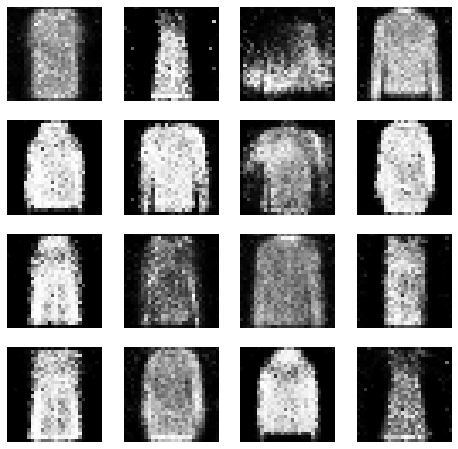

Epoch 47 Batch 400 Generator loss 1.9550 Discriminator loss 0.7098


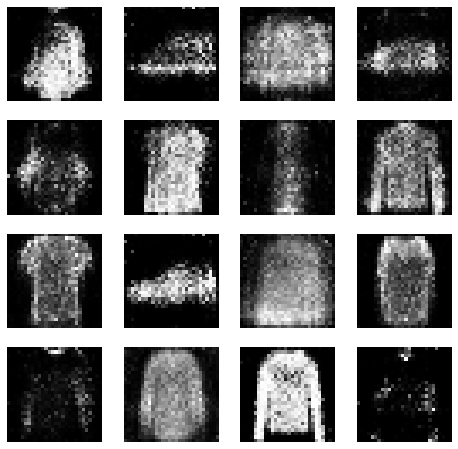

Epoch 48 Batch 0 Generator loss 2.4454 Discriminator loss 0.6258


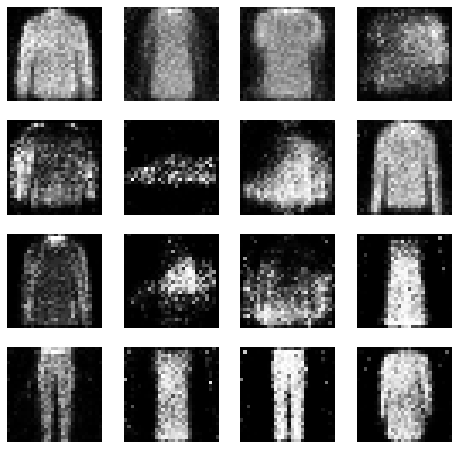

Epoch 48 Batch 400 Generator loss 3.2013 Discriminator loss 0.5205


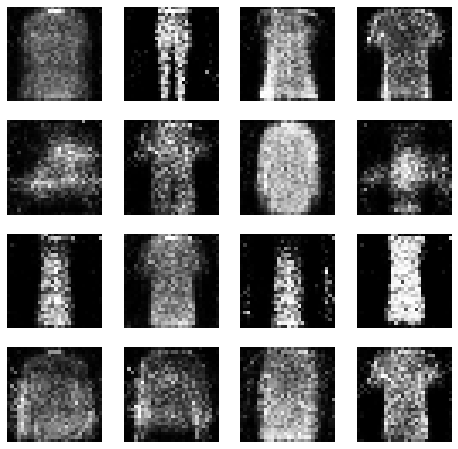

Epoch 49 Batch 0 Generator loss 2.2669 Discriminator loss 0.7250


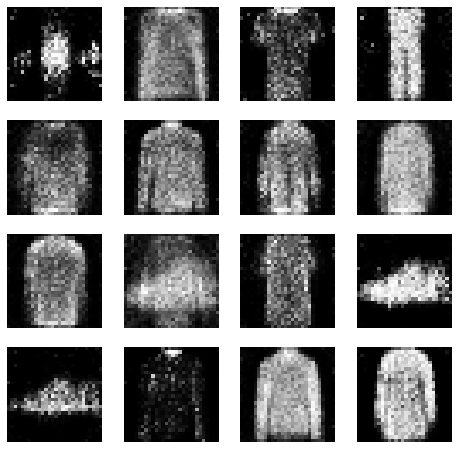

Epoch 49 Batch 400 Generator loss 2.3184 Discriminator loss 0.7445


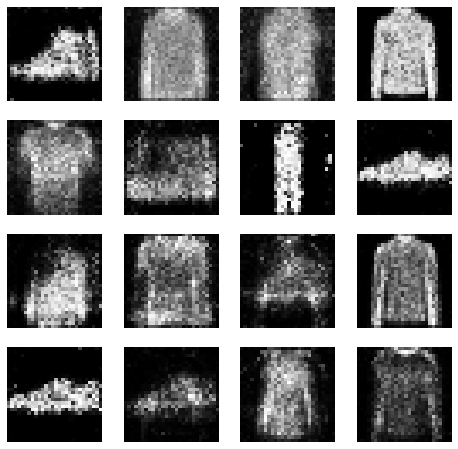

Epoch 50 Batch 0 Generator loss 3.6680 Discriminator loss 0.5829


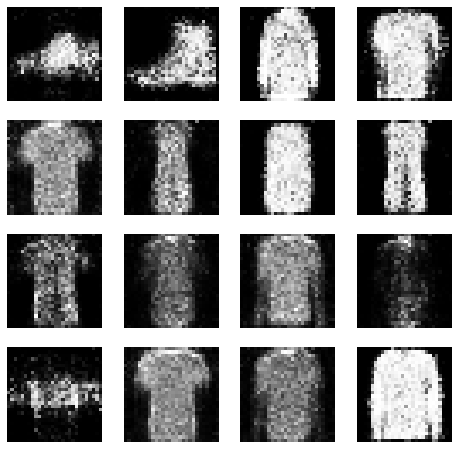

Epoch 50 Batch 400 Generator loss 2.2961 Discriminator loss 0.5457


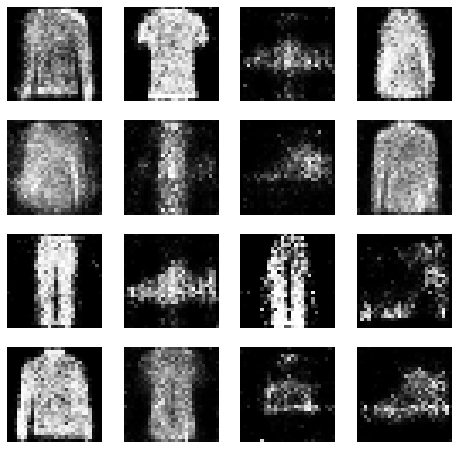

Epoch 51 Batch 0 Generator loss 2.6713 Discriminator loss 0.5664


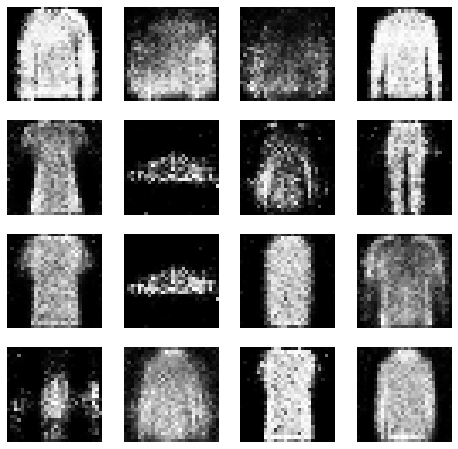

Epoch 51 Batch 400 Generator loss 1.9261 Discriminator loss 0.8920


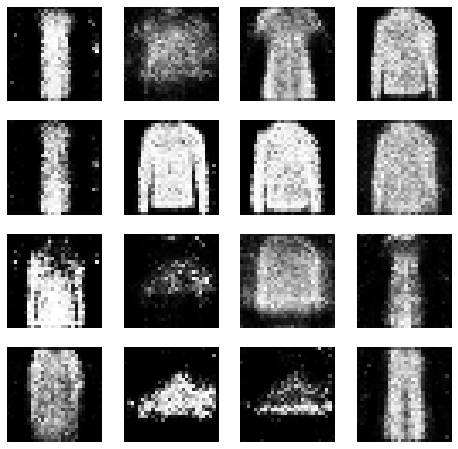

Epoch 52 Batch 0 Generator loss 2.9665 Discriminator loss 0.5821


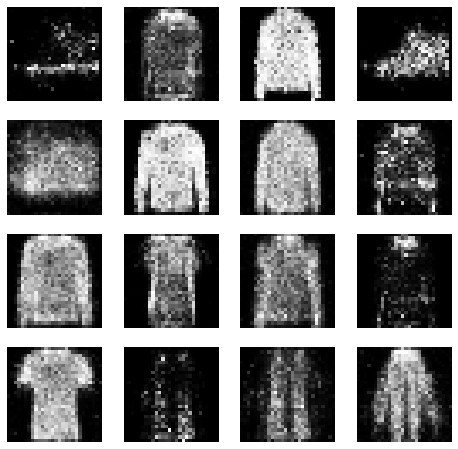

Epoch 52 Batch 400 Generator loss 2.4093 Discriminator loss 0.5549


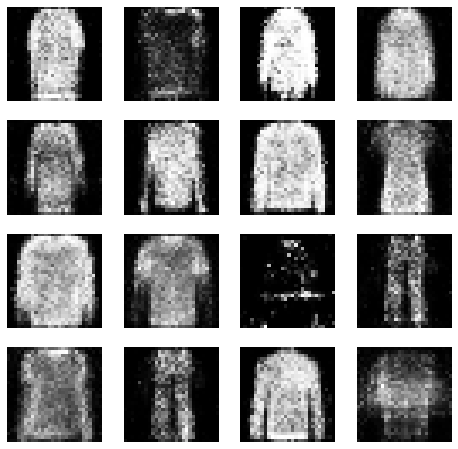

Epoch 53 Batch 0 Generator loss 2.0833 Discriminator loss 0.5593


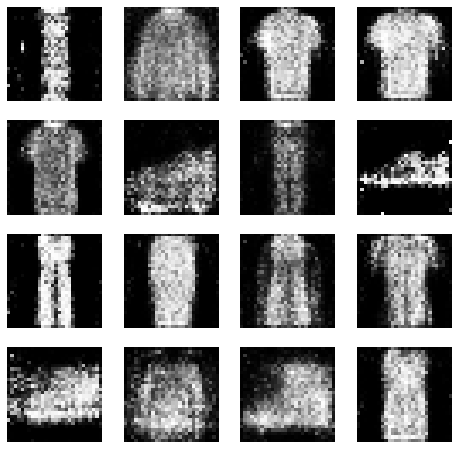

Epoch 53 Batch 400 Generator loss 1.7305 Discriminator loss 0.7258


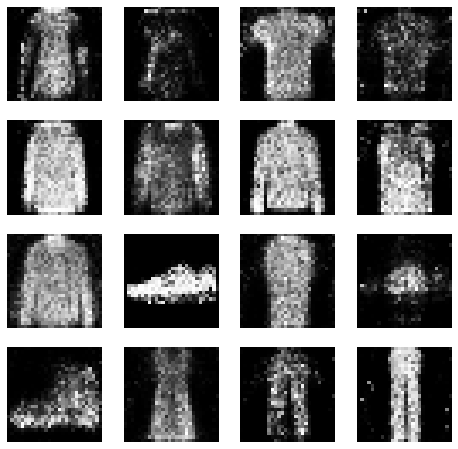

Epoch 54 Batch 0 Generator loss 2.4020 Discriminator loss 0.7647


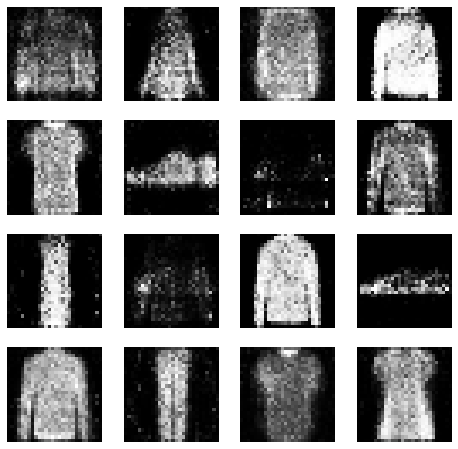

Epoch 54 Batch 400 Generator loss 2.4568 Discriminator loss 0.6353


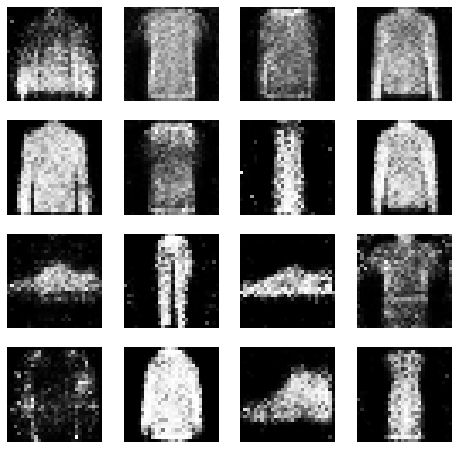

Epoch 55 Batch 0 Generator loss 2.7262 Discriminator loss 0.9019


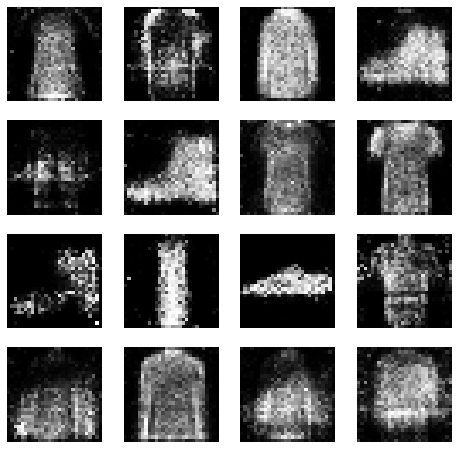

Epoch 55 Batch 400 Generator loss 2.5856 Discriminator loss 0.6010


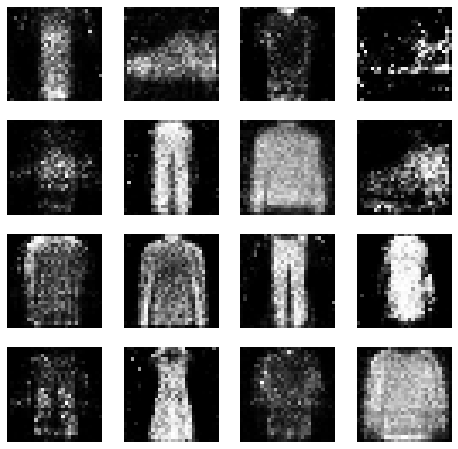

Epoch 56 Batch 0 Generator loss 2.4524 Discriminator loss 0.6538


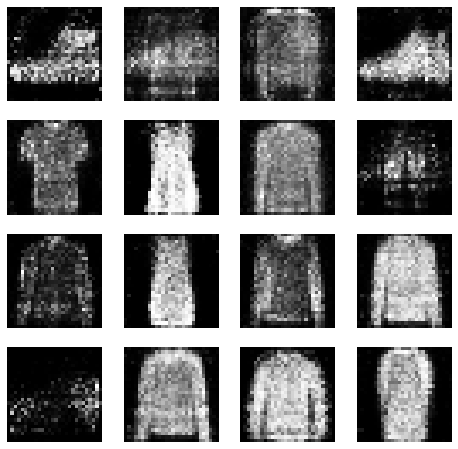

Epoch 56 Batch 400 Generator loss 2.3388 Discriminator loss 0.6697


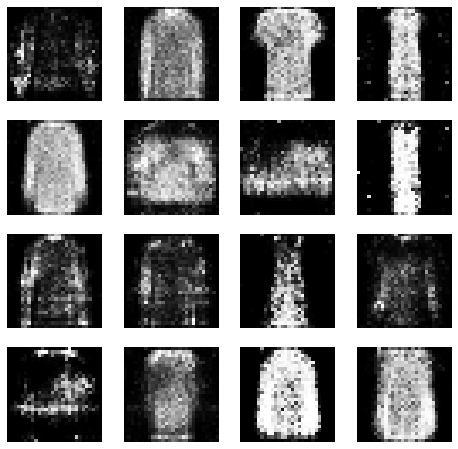

Epoch 57 Batch 0 Generator loss 2.3387 Discriminator loss 0.3819


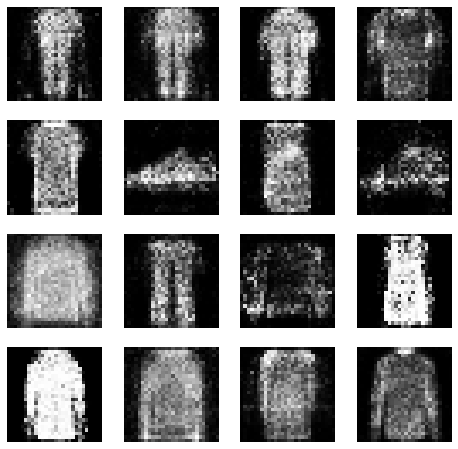

Epoch 57 Batch 400 Generator loss 3.4313 Discriminator loss 0.5114


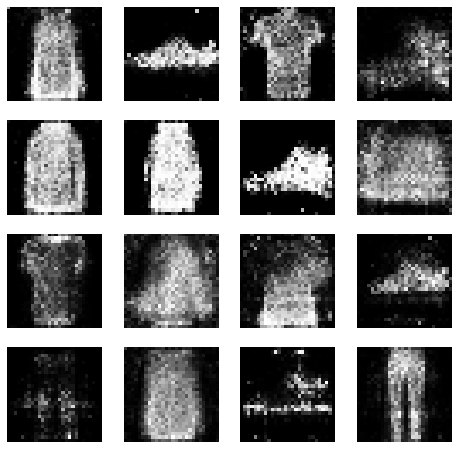

Epoch 58 Batch 0 Generator loss 2.3398 Discriminator loss 0.4198


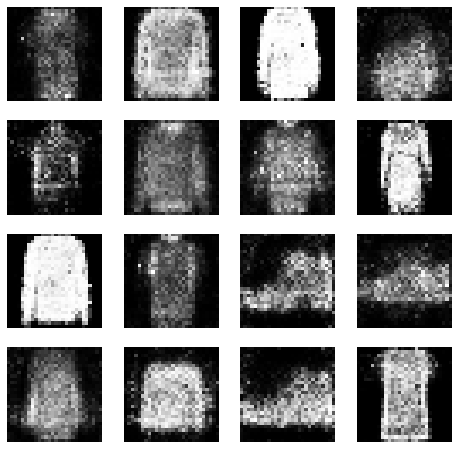

Epoch 58 Batch 400 Generator loss 3.1394 Discriminator loss 0.6532


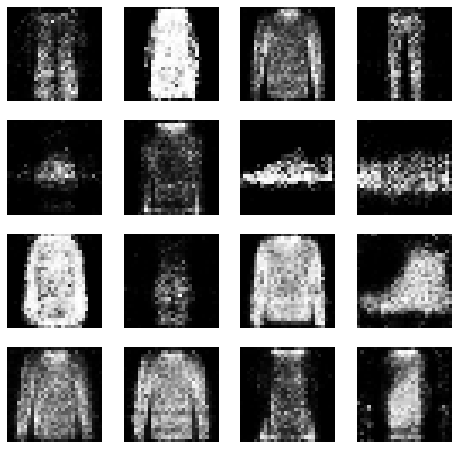

Epoch 59 Batch 0 Generator loss 2.8462 Discriminator loss 0.4898


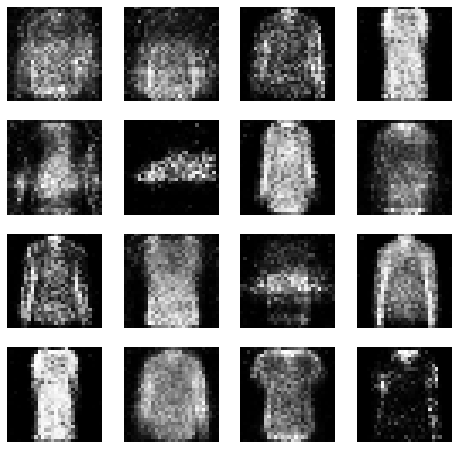

Epoch 59 Batch 400 Generator loss 1.9823 Discriminator loss 0.6808


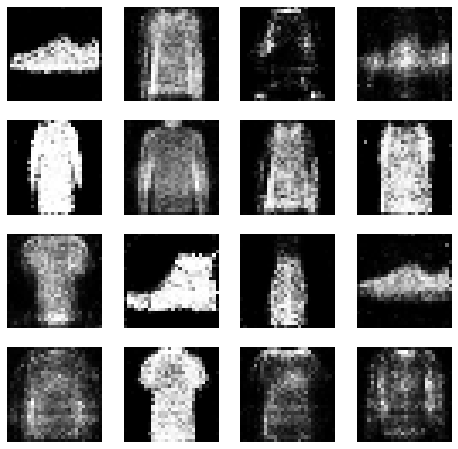

Epoch 60 Batch 0 Generator loss 2.2198 Discriminator loss 0.4761


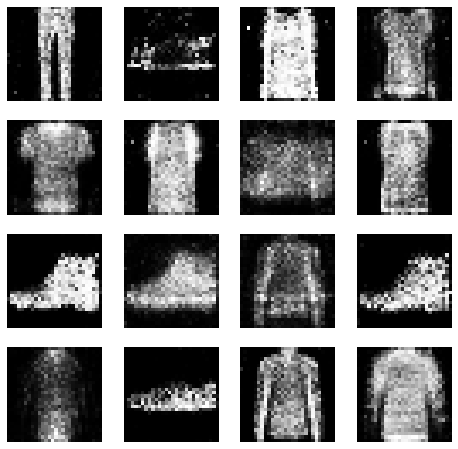

Epoch 60 Batch 400 Generator loss 1.9707 Discriminator loss 0.9135


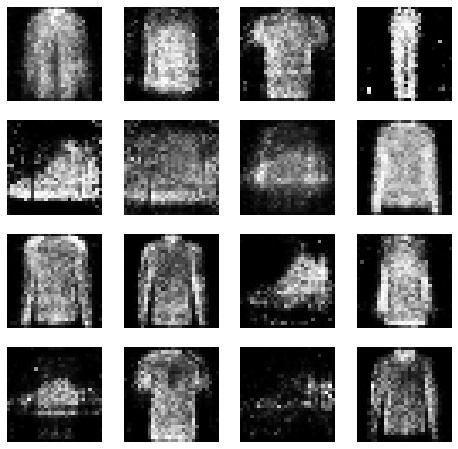

Epoch 61 Batch 0 Generator loss 2.3082 Discriminator loss 0.6255


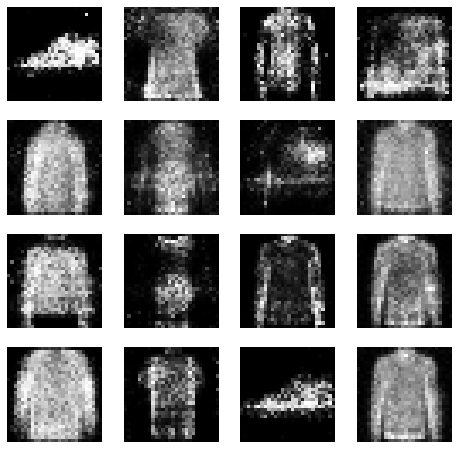

Epoch 61 Batch 400 Generator loss 1.7585 Discriminator loss 0.7475


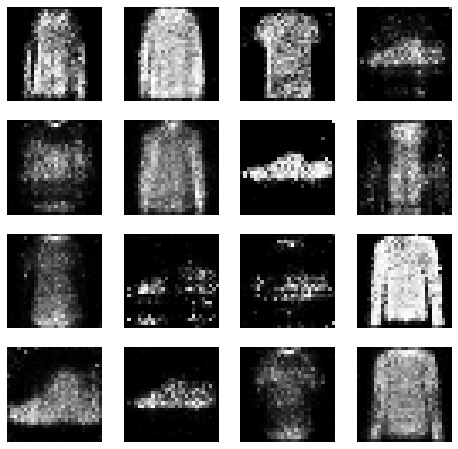

Epoch 62 Batch 0 Generator loss 2.4989 Discriminator loss 0.7642


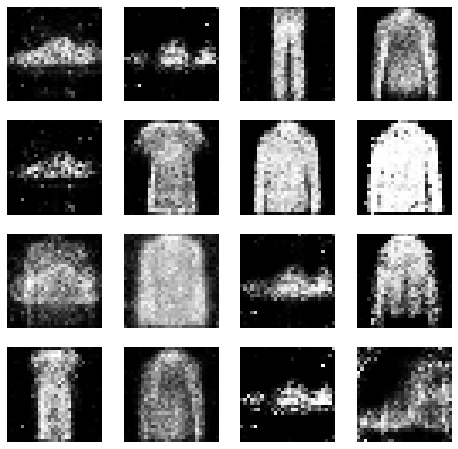

Epoch 62 Batch 400 Generator loss 2.2645 Discriminator loss 0.7078


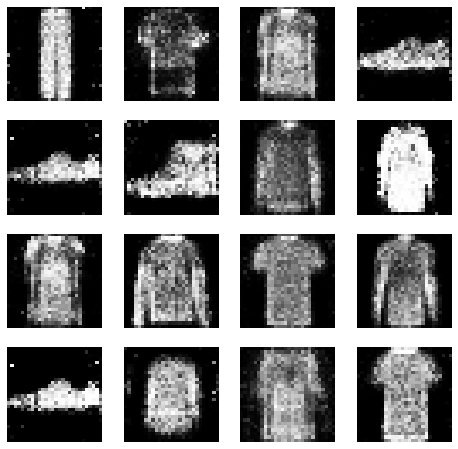

Epoch 63 Batch 0 Generator loss 1.7814 Discriminator loss 0.6838


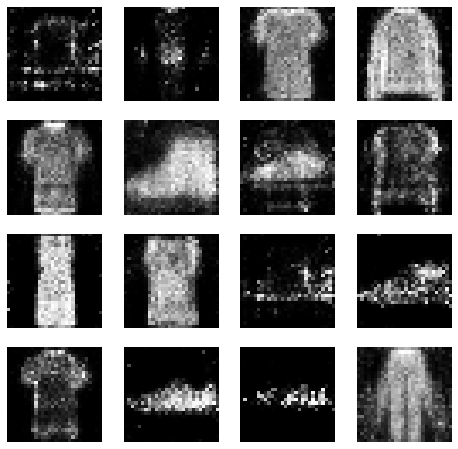

Epoch 63 Batch 400 Generator loss 2.0588 Discriminator loss 0.7810


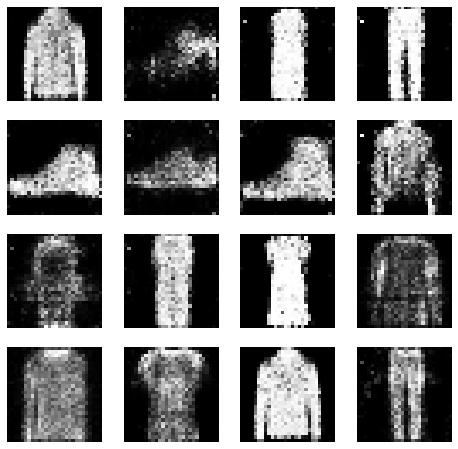

Epoch 64 Batch 0 Generator loss 2.1987 Discriminator loss 0.7499


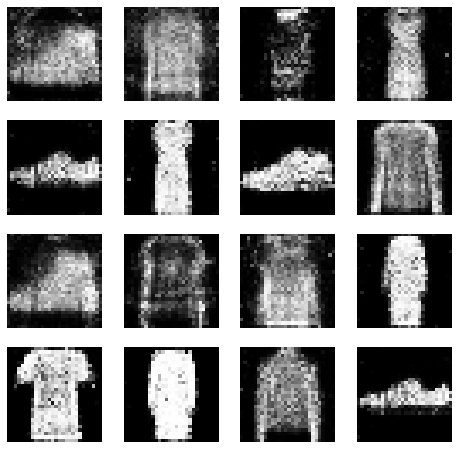

Epoch 64 Batch 400 Generator loss 2.0764 Discriminator loss 0.6903


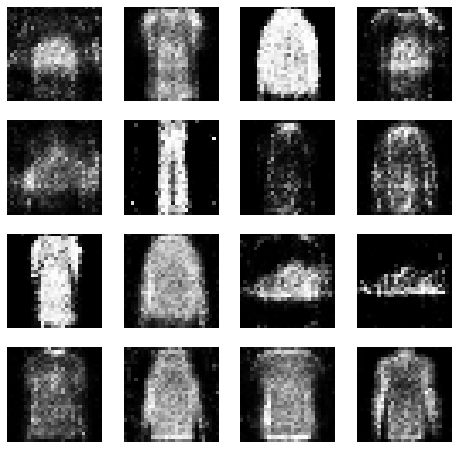

Epoch 65 Batch 0 Generator loss 3.1790 Discriminator loss 0.6754


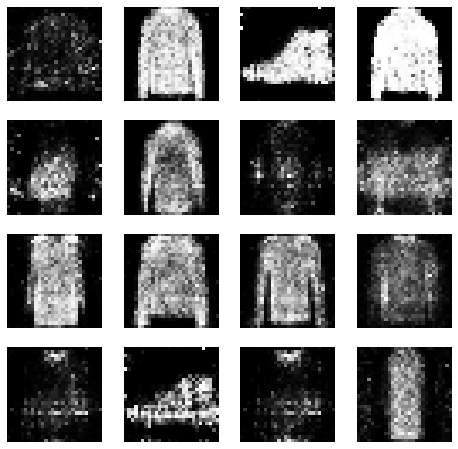

Epoch 65 Batch 400 Generator loss 2.3334 Discriminator loss 0.7927


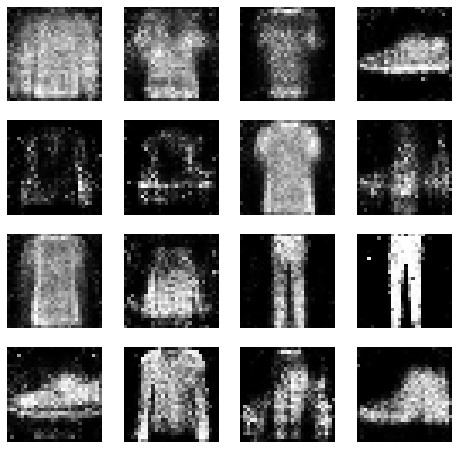

Epoch 66 Batch 0 Generator loss 2.3859 Discriminator loss 0.4950


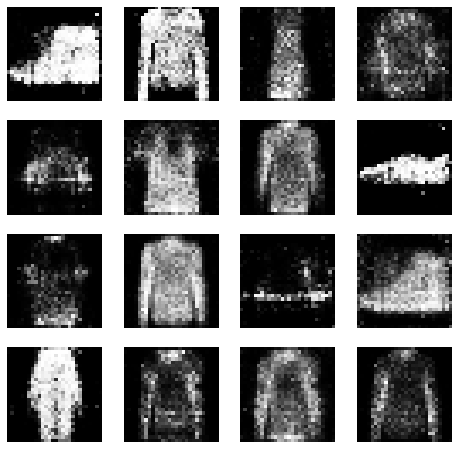

Epoch 66 Batch 400 Generator loss 1.7584 Discriminator loss 0.8529


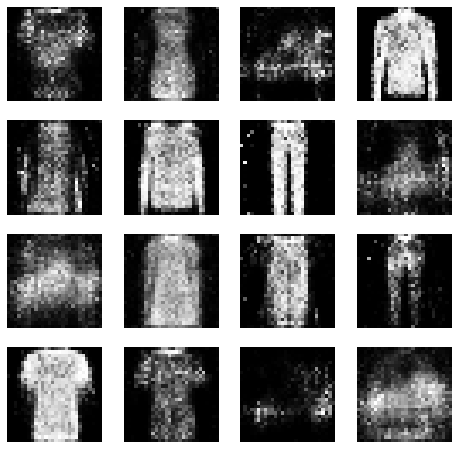

Epoch 67 Batch 0 Generator loss 1.9127 Discriminator loss 0.5842


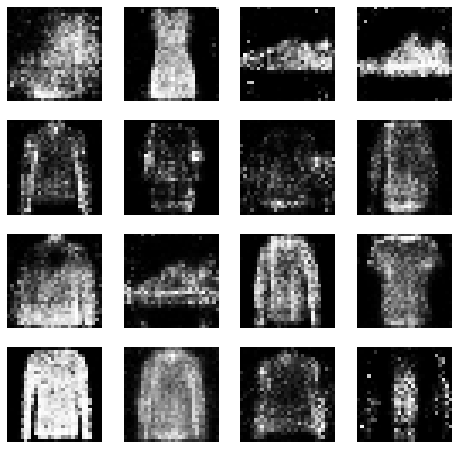

Epoch 67 Batch 400 Generator loss 2.7640 Discriminator loss 0.6436


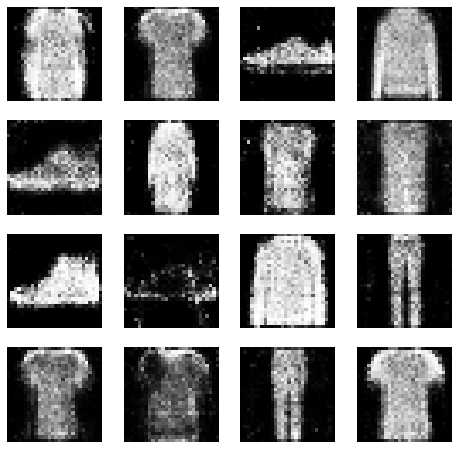

Epoch 68 Batch 0 Generator loss 2.0276 Discriminator loss 0.7887


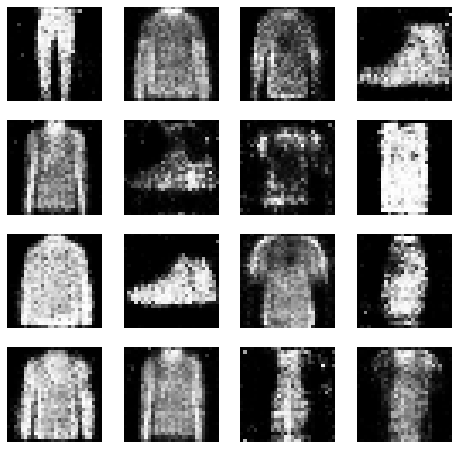

Epoch 68 Batch 400 Generator loss 2.3541 Discriminator loss 0.9015


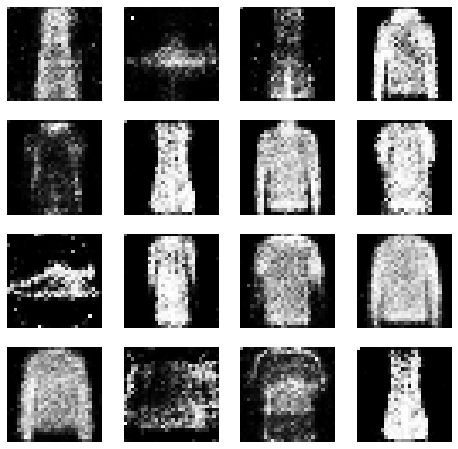

Epoch 69 Batch 0 Generator loss 2.5417 Discriminator loss 0.4776


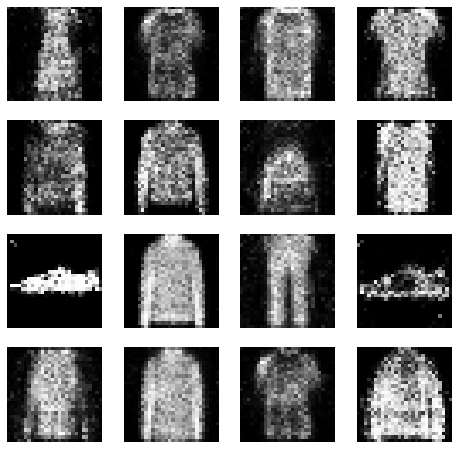

Epoch 69 Batch 400 Generator loss 2.6212 Discriminator loss 0.9058


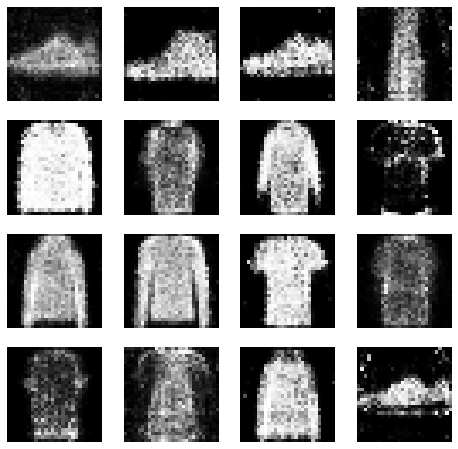

Epoch 70 Batch 0 Generator loss 2.0177 Discriminator loss 1.1005


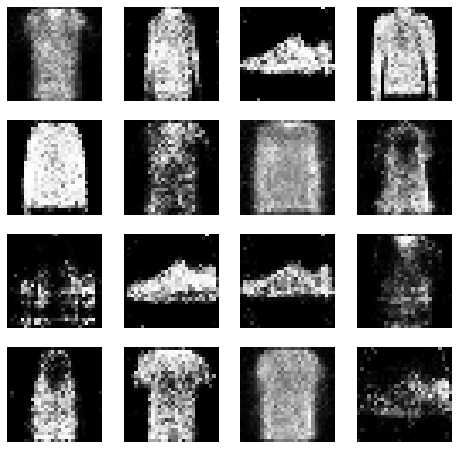

Epoch 70 Batch 400 Generator loss 2.5425 Discriminator loss 0.7429


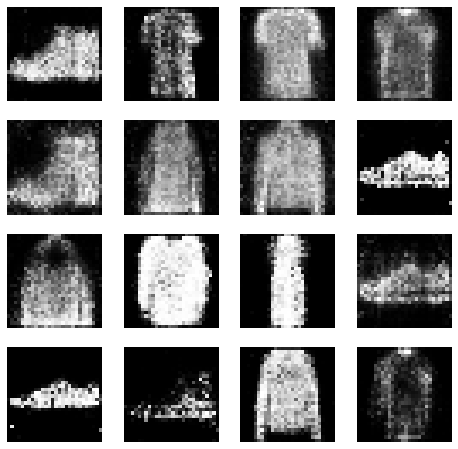

Epoch 71 Batch 0 Generator loss 2.2660 Discriminator loss 0.8892


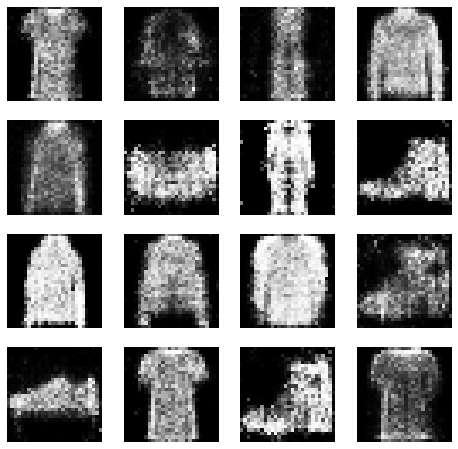

Epoch 71 Batch 400 Generator loss 1.8565 Discriminator loss 0.6397


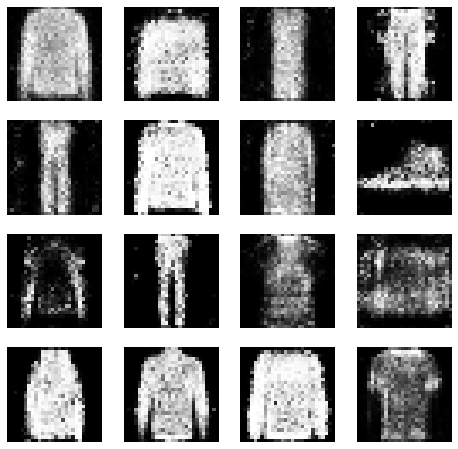

Epoch 72 Batch 0 Generator loss 2.4167 Discriminator loss 0.6280


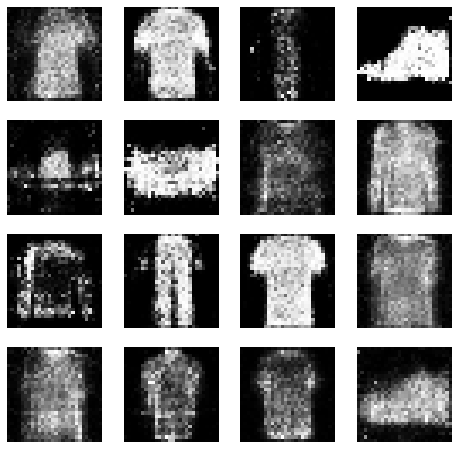

Epoch 72 Batch 400 Generator loss 3.3070 Discriminator loss 0.6038


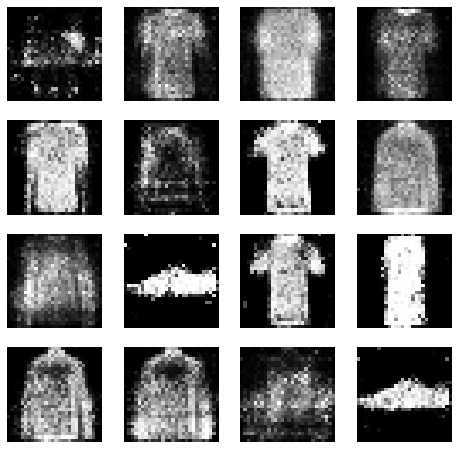

Epoch 73 Batch 0 Generator loss 1.8658 Discriminator loss 0.7868


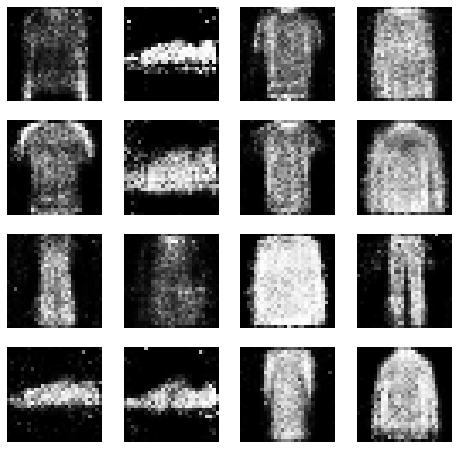

Epoch 73 Batch 400 Generator loss 2.0980 Discriminator loss 0.7533


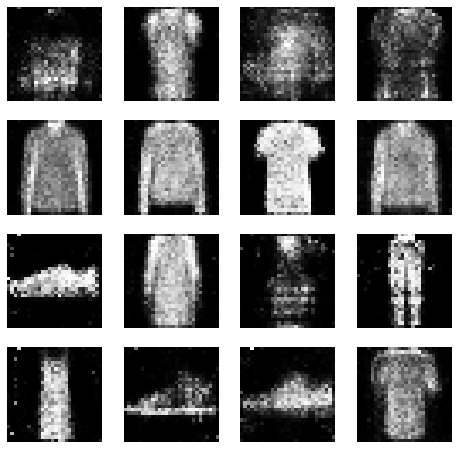

Epoch 74 Batch 0 Generator loss 2.4703 Discriminator loss 0.9144


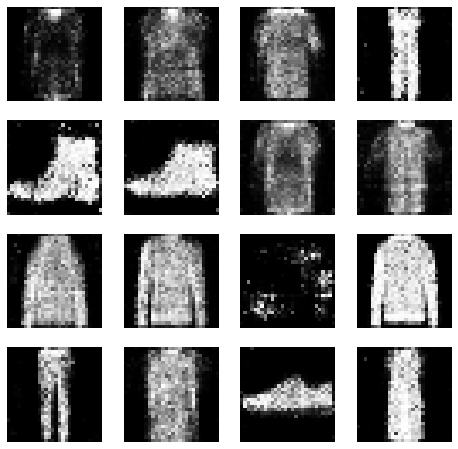

: 

In [157]:
epochs = 50
learning_rate = 2e-4

loss_fn = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)

image_num = 0
for epoch in range(epochs):
    for i , (images, _) in enumerate(trainloader):
        
        real_images = images.view(batch_size, -1).to(device)
        
        discriminator_noise = torch.randn(batch_size, latent_size).to(device)
        generator_noise = torch.randn(batch_size, latent_size).to(device)
        
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # print("-"*50)
        # print("real_images", real_images.shape)
        # print("discriminator_noise", discriminator_noise.shape, "generator_noise", generator_noise.shape)
        # print("real_labels", real_labels.shape, "fake_labels", fake_labels.shape)

        ########## Train Discriminator ##########

        #train discriminator on real images
        pred_labels_real = discriminator(real_images)
        real_loss = loss_fn(pred_labels_real, real_labels)

        #train discriminator on fake images
        fake_images_1 = generator(discriminator_noise)
        pred_labels_fake = discriminator(fake_images_1)
        fake_loss = loss_fn(pred_labels_fake, fake_labels)

        discriminator_loss = real_loss + fake_loss
        
        # print("\nDiscriminator loss", discriminator_loss)
        # print("real_loss", real_loss, "fake_loss", fake_loss)
        # print("pred_labels_real", pred_labels_real.shape, "pred_labels_fake", pred_labels_fake.shape)


        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        discriminator_loss.backward()
        d_optimizer.step()
        
        ########## Train Generator ##########

        fake_images_2 = generator(generator_noise)
        pred_labels_fake_2 = discriminator(fake_images_2)
        generator_loss = loss_fn(pred_labels_fake_2, real_labels)
        
        # print("\nGenerator loss", generator_loss)
        # print("fake_images_2", fake_images_2.shape)
        # print("pred_labels_fake_2", pred_labels_fake_2.shape)

        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        generator_loss.backward()
        g_optimizer.step()

        if i % 400 == 0:
            print(f"Epoch {epoch} Batch {i} Generator loss {generator_loss:.4f} Discriminator loss {discriminator_loss:.4f}")
            display_generated_images(generator, image_num = image_num)
            image_num += 1


In [ ]:
# create a gif of the images without using imageio
import os
import glob
import contextlib
from PIL import Image

# filepaths
fp_in = "generated/*.png"
fp_out = "generated/generated.gif"

# use exit stack to automatically close opened images
with contextlib.ExitStack() as stack:

        # lazily load images
        imgs = (stack.enter_context(Image.open(f))
                for f in sorted(glob.glob(fp_in)))

        # extract  first image from iterator
        img = next(imgs)

        # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                save_all=True, duration=200, loop=0)

        print(f"Saved at {fp_out}")

#display the gif
from IPython.display import Image
Image(filename='generated/generated.gif')

: 

In [ ]:
print("hello world")

: 